### Importing Frameworks and Loading Data

In [2]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import shap

import lightgbm as lgb
from catboost import CatBoostClassifier

import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier

In [3]:
data = pd.read_csv('cleaned_train_data.csv')

In [4]:
data.head()

,Unnamed: 0,Unnamed: 0.1,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0,0.000000,0.513833,0.576355,0.764045,0.148912,0.0,0.738140,0.009718,0.004501,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.000008,0.750455,0.394089,0.865169,0.237435,0.0,0.390478,0.007775,0.006697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0.000015,0.984735,0.576355,0.280899,0.322972,0.0,0.607981,0.010690,0.001425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,0.000023,0.872879,0.576355,0.910112,0.147076,1.0,0.477822,0.009718,0.001425,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,0.000031,0.414742,0.157635,0.213483,0.269309,0.0,0.870012,0.008746,0.001840,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [5]:
data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']) #since these are just indices

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,...,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CCU-CTICU,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU
0,0.513833,0.576355,0.764045,0.148912,0.0,0.738140,0.009718,0.004501,0,0.239484,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.750455,0.394089,0.865169,0.237435,0.0,0.390478,0.007775,0.006697,0,0.214383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.984735,0.576355,0.280899,0.322972,0.0,0.607981,0.010690,0.001425,0,0.384668,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.872879,0.576355,0.910112,0.147076,1.0,0.477822,0.009718,0.001425,0,0.156716,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.414742,0.157635,0.213483,0.269309,0.0,0.870012,0.008746,0.001840,0,0.306588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130152,0.134530,0.029557,0.561798,0.272651,0.0,0.652509,0.998056,0.001556,0,0.348711,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130153,0.383735,0.029557,0.887640,0.279564,0.0,0.435006,0.995141,0.001477,0,0.270014,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
130154,0.550902,0.029557,0.820225,0.328873,0.0,0.695325,0.993197,0.002235,0,0.430122,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
130155,0.572439,0.832512,0.910112,0.180548,0.0,0.825484,0.997085,0.002491,0,0.307327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Dropping Columns Based on Feature Selection

In [6]:
top_11 = data[['d1_glucose_max', 'icu_id', 'd1_glucose_min', 'hospital_id', 'glucose_apache', 'bmi', 'age', 'weight', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'd1_hemaglobin_max', 'diabetes_mellitus']]

In [7]:
top_50 = data[['d1_glucose_max', 'icu_id', 'd1_glucose_min', 'hospital_id', 'glucose_apache', 'bmi', 'age',
               'weight', 'apache_3j_diagnosis', 'apache_2_diagnosis', 'd1_hemaglobin_max', 'd1_platelets_min',
               'arf_apache', 'pre_icu_los_days', 'd1_wbc_max', 'h1_glucose_min', 'd1_creatinine_min', 'd1_calcium_min',
               'h1_glucose_max', 'd1_bun_min', 'heart_rate_apache', 'd1_hco3_min', 'd1_heartrate_max',
               'd1_creatinine_max', 'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_lactate_max',
               'urineoutput_apache', 'd1_sysbp_max', 'creatinine_apache', 'ethnicity_Caucasian', 'bun_apache',
               'd1_potassium_max', 'd1_resprate_min', 'd1_sysbp_invasive_max', 'gcs_motor_apache',
               'd1_hematocrit_max', 'd1_hematocrit_min', 'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'd1_temp_min',
               'h1_sysbp_invasive_max', 'd1_diasbp_max', 'd1_bilirubin_max', 'wbc_apache', 'd1_arterial_ph_min',
               'resprate_apache', 'height', 'sodium_apache', 'temp_apache', 'diabetes_mellitus']]

### Creating a Train-Test Split for Evaluation

In [8]:
X, y = top_50.drop(columns=['diabetes_mellitus']), top_50['diabetes_mellitus']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Tuning & Training Top Performers

From the second phase of analysis, I selected catboost and LGBM as the final contenders for the model tuning and training stage.

#### LGBM Tuning and Training

In [10]:
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x)) #modify this for all train/test data
X_test = X_test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [11]:
lgb_train = lgb.Dataset(X_train, y_train)

In [12]:
params = {
            'objective': 'binary',
            'boosting': 'gbdt',
            'learning_rate': 0.01,
            'verbose': 0,
            'num_leaves': 100,
            'bagging_fraction': 0.95,
            'bagging_freq': 1,
            'bagging_seed': 1,
            'feature_fraction': 0.9,
            'feature_fraction_seed': 1,
            'max_bin': 1024,
            'num_rounds': 2500,
            'metric' : 'auc'
        }

lgbm_model = lgb.train(params, train_set = lgb_train, verbose_eval=5)

Found `num_rounds` in params. Will use it instead of argument


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.023502 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [13]:
y_pred = lgbm_model.predict(X_test)

#### CatBoost Tuning and Training

In [60]:
catboost_model = CatBoostClassifier(iterations=10000,
                           depth=10,
                           learning_rate=0.01,
                           loss_function='Logloss',
                           use_best_model = True,
                           eval_metric = 'AUC',
                           od_type = 'IncToDec',
                           od_pval = 1e-6,
                           verbose=True)

catboost_model.fit(X_train, y_train, eval_set = (X_test, y_test))

0:	test: 0.7805259	best: 0.7805259 (0)	total: 354ms	remaining: 59m 1s
1:	test: 0.8020155	best: 0.8020155 (1)	total: 453ms	remaining: 37m 45s
2:	test: 0.8082182	best: 0.8082182 (2)	total: 552ms	remaining: 30m 37s
3:	test: 0.8092888	best: 0.8092888 (3)	total: 657ms	remaining: 27m 21s
4:	test: 0.8085402	best: 0.8092888 (3)	total: 774ms	remaining: 25m 46s
5:	test: 0.8081210	best: 0.8092888 (3)	total: 890ms	remaining: 24m 42s
6:	test: 0.8080583	best: 0.8092888 (3)	total: 1.03s	remaining: 24m 37s
7:	test: 0.8090272	best: 0.8092888 (3)	total: 1.14s	remaining: 23m 41s
8:	test: 0.8113394	best: 0.8113394 (8)	total: 1.24s	remaining: 22m 59s
9:	test: 0.8125928	best: 0.8125928 (9)	total: 1.34s	remaining: 22m 18s
10:	test: 0.8122538	best: 0.8125928 (9)	total: 1.45s	remaining: 21m 56s
11:	test: 0.8122012	best: 0.8125928 (9)	total: 1.55s	remaining: 21m 30s
12:	test: 0.8132300	best: 0.8132300 (12)	total: 1.65s	remaining: 21m 7s
13:	test: 0.8142092	best: 0.8142092 (13)	total: 1.75s	remaining: 20m 45s
14

113:	test: 0.8306213	best: 0.8306213 (113)	total: 13.3s	remaining: 19m 11s
114:	test: 0.8308517	best: 0.8308517 (114)	total: 13.4s	remaining: 19m 9s
115:	test: 0.8309887	best: 0.8309887 (115)	total: 13.5s	remaining: 19m 9s
116:	test: 0.8310615	best: 0.8310615 (116)	total: 13.6s	remaining: 19m 9s
117:	test: 0.8310855	best: 0.8310855 (117)	total: 13.7s	remaining: 19m 8s
118:	test: 0.8311587	best: 0.8311587 (118)	total: 13.8s	remaining: 19m 8s
119:	test: 0.8313609	best: 0.8313609 (119)	total: 13.9s	remaining: 19m 8s
120:	test: 0.8315999	best: 0.8315999 (120)	total: 14s	remaining: 19m 6s
121:	test: 0.8317502	best: 0.8317502 (121)	total: 14.1s	remaining: 19m 5s
122:	test: 0.8318118	best: 0.8318118 (122)	total: 14.3s	remaining: 19m 6s
123:	test: 0.8318414	best: 0.8318414 (123)	total: 14.4s	remaining: 19m 5s
124:	test: 0.8320026	best: 0.8320026 (124)	total: 14.5s	remaining: 19m 3s
125:	test: 0.8321384	best: 0.8321384 (125)	total: 14.6s	remaining: 19m 2s
126:	test: 0.8321500	best: 0.8321500 (1

224:	test: 0.8394643	best: 0.8394643 (224)	total: 27.4s	remaining: 19m 49s
225:	test: 0.8395344	best: 0.8395344 (225)	total: 27.5s	remaining: 19m 51s
226:	test: 0.8396003	best: 0.8396003 (226)	total: 27.7s	remaining: 19m 53s
227:	test: 0.8396426	best: 0.8396426 (227)	total: 27.9s	remaining: 19m 54s
228:	test: 0.8397088	best: 0.8397088 (228)	total: 28s	remaining: 19m 55s
229:	test: 0.8397501	best: 0.8397501 (229)	total: 28.2s	remaining: 19m 56s
230:	test: 0.8398279	best: 0.8398279 (230)	total: 28.3s	remaining: 19m 56s
231:	test: 0.8398814	best: 0.8398814 (231)	total: 28.4s	remaining: 19m 56s
232:	test: 0.8399008	best: 0.8399008 (232)	total: 28.5s	remaining: 19m 56s
233:	test: 0.8399500	best: 0.8399500 (233)	total: 28.7s	remaining: 19m 56s
234:	test: 0.8400312	best: 0.8400312 (234)	total: 28.8s	remaining: 19m 56s
235:	test: 0.8400832	best: 0.8400832 (235)	total: 28.9s	remaining: 19m 57s
236:	test: 0.8401886	best: 0.8401886 (236)	total: 29.1s	remaining: 19m 56s
237:	test: 0.8402771	best: 

336:	test: 0.8450840	best: 0.8450840 (336)	total: 42s	remaining: 20m 5s
337:	test: 0.8451134	best: 0.8451134 (337)	total: 42.2s	remaining: 20m 5s
338:	test: 0.8451352	best: 0.8451352 (338)	total: 42.3s	remaining: 20m 5s
339:	test: 0.8452049	best: 0.8452049 (339)	total: 42.4s	remaining: 20m 5s
340:	test: 0.8452482	best: 0.8452482 (340)	total: 42.5s	remaining: 20m 4s
341:	test: 0.8452914	best: 0.8452914 (341)	total: 42.7s	remaining: 20m 4s
342:	test: 0.8453244	best: 0.8453244 (342)	total: 42.8s	remaining: 20m 4s
343:	test: 0.8453488	best: 0.8453488 (343)	total: 42.9s	remaining: 20m 5s
344:	test: 0.8454218	best: 0.8454218 (344)	total: 43.1s	remaining: 20m 5s
345:	test: 0.8454462	best: 0.8454462 (345)	total: 43.2s	remaining: 20m 5s
346:	test: 0.8454481	best: 0.8454481 (346)	total: 43.3s	remaining: 20m 5s
347:	test: 0.8455103	best: 0.8455103 (347)	total: 43.5s	remaining: 20m 5s
348:	test: 0.8455531	best: 0.8455531 (348)	total: 43.6s	remaining: 20m 5s
349:	test: 0.8455770	best: 0.8455770 (34

448:	test: 0.8487378	best: 0.8487378 (448)	total: 56.6s	remaining: 20m 4s
449:	test: 0.8487641	best: 0.8487641 (449)	total: 56.7s	remaining: 20m 4s
450:	test: 0.8487935	best: 0.8487935 (450)	total: 56.9s	remaining: 20m 4s
451:	test: 0.8488111	best: 0.8488111 (451)	total: 57s	remaining: 20m 4s
452:	test: 0.8488309	best: 0.8488309 (452)	total: 57.2s	remaining: 20m 5s
453:	test: 0.8488418	best: 0.8488418 (453)	total: 57.3s	remaining: 20m 4s
454:	test: 0.8488637	best: 0.8488637 (454)	total: 57.4s	remaining: 20m 5s
455:	test: 0.8488961	best: 0.8488961 (455)	total: 57.6s	remaining: 20m 4s
456:	test: 0.8489290	best: 0.8489290 (456)	total: 57.7s	remaining: 20m 4s
457:	test: 0.8489687	best: 0.8489687 (457)	total: 57.8s	remaining: 20m 4s
458:	test: 0.8490091	best: 0.8490091 (458)	total: 58s	remaining: 20m 4s
459:	test: 0.8490458	best: 0.8490458 (459)	total: 58.1s	remaining: 20m 4s
460:	test: 0.8490600	best: 0.8490600 (460)	total: 58.2s	remaining: 20m 4s
461:	test: 0.8490829	best: 0.8490829 (461)

560:	test: 0.8516531	best: 0.8516531 (560)	total: 1m 10s	remaining: 19m 52s
561:	test: 0.8516957	best: 0.8516957 (561)	total: 1m 10s	remaining: 19m 52s
562:	test: 0.8517229	best: 0.8517229 (562)	total: 1m 11s	remaining: 19m 51s
563:	test: 0.8517366	best: 0.8517366 (563)	total: 1m 11s	remaining: 19m 51s
564:	test: 0.8517855	best: 0.8517855 (564)	total: 1m 11s	remaining: 19m 51s
565:	test: 0.8518303	best: 0.8518303 (565)	total: 1m 11s	remaining: 19m 51s
566:	test: 0.8518487	best: 0.8518487 (566)	total: 1m 11s	remaining: 19m 51s
567:	test: 0.8518581	best: 0.8518581 (567)	total: 1m 11s	remaining: 19m 51s
568:	test: 0.8518708	best: 0.8518708 (568)	total: 1m 11s	remaining: 19m 50s
569:	test: 0.8518804	best: 0.8518804 (569)	total: 1m 11s	remaining: 19m 50s
570:	test: 0.8519304	best: 0.8519304 (570)	total: 1m 12s	remaining: 19m 50s
571:	test: 0.8519514	best: 0.8519514 (571)	total: 1m 12s	remaining: 19m 49s
572:	test: 0.8519693	best: 0.8519693 (572)	total: 1m 12s	remaining: 19m 49s
573:	test: 0

668:	test: 0.8538247	best: 0.8538247 (668)	total: 1m 24s	remaining: 19m 32s
669:	test: 0.8538374	best: 0.8538374 (669)	total: 1m 24s	remaining: 19m 31s
670:	test: 0.8538539	best: 0.8538539 (670)	total: 1m 24s	remaining: 19m 31s
671:	test: 0.8538638	best: 0.8538638 (671)	total: 1m 24s	remaining: 19m 31s
672:	test: 0.8538896	best: 0.8538896 (672)	total: 1m 24s	remaining: 19m 31s
673:	test: 0.8538965	best: 0.8538965 (673)	total: 1m 24s	remaining: 19m 31s
674:	test: 0.8539140	best: 0.8539140 (674)	total: 1m 24s	remaining: 19m 31s
675:	test: 0.8539359	best: 0.8539359 (675)	total: 1m 24s	remaining: 19m 30s
676:	test: 0.8539466	best: 0.8539466 (676)	total: 1m 25s	remaining: 19m 30s
677:	test: 0.8539686	best: 0.8539686 (677)	total: 1m 25s	remaining: 19m 30s
678:	test: 0.8539864	best: 0.8539864 (678)	total: 1m 25s	remaining: 19m 30s
679:	test: 0.8539941	best: 0.8539941 (679)	total: 1m 25s	remaining: 19m 29s
680:	test: 0.8540019	best: 0.8540019 (680)	total: 1m 25s	remaining: 19m 29s
681:	test: 0

776:	test: 0.8554315	best: 0.8554315 (776)	total: 1m 37s	remaining: 19m 13s
777:	test: 0.8554452	best: 0.8554452 (777)	total: 1m 37s	remaining: 19m 13s
778:	test: 0.8554442	best: 0.8554452 (777)	total: 1m 37s	remaining: 19m 12s
779:	test: 0.8554513	best: 0.8554513 (779)	total: 1m 37s	remaining: 19m 12s
780:	test: 0.8554754	best: 0.8554754 (780)	total: 1m 37s	remaining: 19m 12s
781:	test: 0.8554803	best: 0.8554803 (781)	total: 1m 37s	remaining: 19m 12s
782:	test: 0.8554936	best: 0.8554936 (782)	total: 1m 37s	remaining: 19m 12s
783:	test: 0.8555000	best: 0.8555000 (783)	total: 1m 38s	remaining: 19m 12s
784:	test: 0.8555113	best: 0.8555113 (784)	total: 1m 38s	remaining: 19m 12s
785:	test: 0.8555331	best: 0.8555331 (785)	total: 1m 38s	remaining: 19m 12s
786:	test: 0.8555365	best: 0.8555365 (786)	total: 1m 38s	remaining: 19m 11s
787:	test: 0.8555495	best: 0.8555495 (787)	total: 1m 38s	remaining: 19m 11s
788:	test: 0.8555604	best: 0.8555604 (788)	total: 1m 38s	remaining: 19m 11s
789:	test: 0

886:	test: 0.8568224	best: 0.8568224 (886)	total: 1m 50s	remaining: 18m 53s
887:	test: 0.8568372	best: 0.8568372 (887)	total: 1m 50s	remaining: 18m 53s
888:	test: 0.8568464	best: 0.8568464 (888)	total: 1m 50s	remaining: 18m 53s
889:	test: 0.8568614	best: 0.8568614 (889)	total: 1m 50s	remaining: 18m 53s
890:	test: 0.8568705	best: 0.8568705 (890)	total: 1m 50s	remaining: 18m 53s
891:	test: 0.8568937	best: 0.8568937 (891)	total: 1m 50s	remaining: 18m 52s
892:	test: 0.8568898	best: 0.8568937 (891)	total: 1m 51s	remaining: 18m 52s
893:	test: 0.8568988	best: 0.8568988 (893)	total: 1m 51s	remaining: 18m 52s
894:	test: 0.8569167	best: 0.8569167 (894)	total: 1m 51s	remaining: 18m 52s
895:	test: 0.8569215	best: 0.8569215 (895)	total: 1m 51s	remaining: 18m 52s
896:	test: 0.8569319	best: 0.8569319 (896)	total: 1m 51s	remaining: 18m 52s
897:	test: 0.8569370	best: 0.8569370 (897)	total: 1m 51s	remaining: 18m 51s
898:	test: 0.8569513	best: 0.8569513 (898)	total: 1m 51s	remaining: 18m 51s
899:	test: 0

996:	test: 0.8581273	best: 0.8581273 (996)	total: 2m 4s	remaining: 18m 48s
997:	test: 0.8581374	best: 0.8581374 (997)	total: 2m 5s	remaining: 18m 48s
998:	test: 0.8581433	best: 0.8581433 (998)	total: 2m 5s	remaining: 18m 48s
999:	test: 0.8581439	best: 0.8581439 (999)	total: 2m 5s	remaining: 18m 48s
1000:	test: 0.8581465	best: 0.8581465 (1000)	total: 2m 5s	remaining: 18m 48s
1001:	test: 0.8581507	best: 0.8581507 (1001)	total: 2m 5s	remaining: 18m 47s
1002:	test: 0.8581543	best: 0.8581543 (1002)	total: 2m 5s	remaining: 18m 48s
1003:	test: 0.8581767	best: 0.8581767 (1003)	total: 2m 5s	remaining: 18m 47s
1004:	test: 0.8582081	best: 0.8582081 (1004)	total: 2m 6s	remaining: 18m 47s
1005:	test: 0.8582148	best: 0.8582148 (1005)	total: 2m 6s	remaining: 18m 47s
1006:	test: 0.8582323	best: 0.8582323 (1006)	total: 2m 6s	remaining: 18m 47s
1007:	test: 0.8582424	best: 0.8582424 (1007)	total: 2m 6s	remaining: 18m 47s
1008:	test: 0.8582461	best: 0.8582461 (1008)	total: 2m 6s	remaining: 18m 47s
1009:	t

1102:	test: 0.8593065	best: 0.8593065 (1102)	total: 2m 18s	remaining: 18m 34s
1103:	test: 0.8593093	best: 0.8593093 (1103)	total: 2m 18s	remaining: 18m 34s
1104:	test: 0.8593363	best: 0.8593363 (1104)	total: 2m 18s	remaining: 18m 34s
1105:	test: 0.8593468	best: 0.8593468 (1105)	total: 2m 18s	remaining: 18m 34s
1106:	test: 0.8593465	best: 0.8593468 (1105)	total: 2m 18s	remaining: 18m 34s
1107:	test: 0.8593474	best: 0.8593474 (1107)	total: 2m 18s	remaining: 18m 34s
1108:	test: 0.8593644	best: 0.8593644 (1108)	total: 2m 19s	remaining: 18m 34s
1109:	test: 0.8593719	best: 0.8593719 (1109)	total: 2m 19s	remaining: 18m 34s
1110:	test: 0.8593785	best: 0.8593785 (1110)	total: 2m 19s	remaining: 18m 34s
1111:	test: 0.8593795	best: 0.8593795 (1111)	total: 2m 19s	remaining: 18m 34s
1112:	test: 0.8593880	best: 0.8593880 (1112)	total: 2m 19s	remaining: 18m 34s
1113:	test: 0.8593950	best: 0.8593950 (1113)	total: 2m 19s	remaining: 18m 34s
1114:	test: 0.8594013	best: 0.8594013 (1114)	total: 2m 19s	remai

1209:	test: 0.8603926	best: 0.8603926 (1209)	total: 2m 32s	remaining: 18m 28s
1210:	test: 0.8603982	best: 0.8603982 (1210)	total: 2m 32s	remaining: 18m 28s
1211:	test: 0.8604060	best: 0.8604060 (1211)	total: 2m 32s	remaining: 18m 27s
1212:	test: 0.8604144	best: 0.8604144 (1212)	total: 2m 32s	remaining: 18m 27s
1213:	test: 0.8604280	best: 0.8604280 (1213)	total: 2m 33s	remaining: 18m 27s
1214:	test: 0.8604463	best: 0.8604463 (1214)	total: 2m 33s	remaining: 18m 27s
1215:	test: 0.8604515	best: 0.8604515 (1215)	total: 2m 33s	remaining: 18m 28s
1216:	test: 0.8604555	best: 0.8604555 (1216)	total: 2m 33s	remaining: 18m 28s
1217:	test: 0.8604594	best: 0.8604594 (1217)	total: 2m 33s	remaining: 18m 28s
1218:	test: 0.8604595	best: 0.8604595 (1218)	total: 2m 33s	remaining: 18m 28s
1219:	test: 0.8604663	best: 0.8604663 (1219)	total: 2m 34s	remaining: 18m 28s
1220:	test: 0.8604754	best: 0.8604754 (1220)	total: 2m 34s	remaining: 18m 28s
1221:	test: 0.8604782	best: 0.8604782 (1221)	total: 2m 34s	remai

1315:	test: 0.8612596	best: 0.8612596 (1315)	total: 2m 46s	remaining: 18m 18s
1316:	test: 0.8612736	best: 0.8612736 (1316)	total: 2m 46s	remaining: 18m 18s
1317:	test: 0.8612853	best: 0.8612853 (1317)	total: 2m 46s	remaining: 18m 18s
1318:	test: 0.8612921	best: 0.8612921 (1318)	total: 2m 46s	remaining: 18m 18s
1319:	test: 0.8612991	best: 0.8612991 (1319)	total: 2m 47s	remaining: 18m 18s
1320:	test: 0.8613275	best: 0.8613275 (1320)	total: 2m 47s	remaining: 18m 18s
1321:	test: 0.8613354	best: 0.8613354 (1321)	total: 2m 47s	remaining: 18m 17s
1322:	test: 0.8613363	best: 0.8613363 (1322)	total: 2m 47s	remaining: 18m 17s
1323:	test: 0.8613460	best: 0.8613460 (1323)	total: 2m 47s	remaining: 18m 17s
1324:	test: 0.8613471	best: 0.8613471 (1324)	total: 2m 47s	remaining: 18m 17s
1325:	test: 0.8613577	best: 0.8613577 (1325)	total: 2m 47s	remaining: 18m 17s
1326:	test: 0.8613596	best: 0.8613596 (1326)	total: 2m 47s	remaining: 18m 17s
1327:	test: 0.8613701	best: 0.8613701 (1327)	total: 2m 48s	remai

1421:	test: 0.8621253	best: 0.8621253 (1421)	total: 3m	remaining: 18m 7s
1422:	test: 0.8621282	best: 0.8621282 (1422)	total: 3m	remaining: 18m 7s
1423:	test: 0.8621251	best: 0.8621282 (1422)	total: 3m	remaining: 18m 6s
1424:	test: 0.8621260	best: 0.8621282 (1422)	total: 3m	remaining: 18m 6s
1425:	test: 0.8621273	best: 0.8621282 (1422)	total: 3m	remaining: 18m 6s
1426:	test: 0.8621326	best: 0.8621326 (1426)	total: 3m	remaining: 18m 6s
1427:	test: 0.8621340	best: 0.8621340 (1427)	total: 3m	remaining: 18m 6s
1428:	test: 0.8621431	best: 0.8621431 (1428)	total: 3m 1s	remaining: 18m 6s
1429:	test: 0.8621474	best: 0.8621474 (1429)	total: 3m 1s	remaining: 18m 6s
1430:	test: 0.8621546	best: 0.8621546 (1430)	total: 3m 1s	remaining: 18m 5s
1431:	test: 0.8621610	best: 0.8621610 (1431)	total: 3m 1s	remaining: 18m 5s
1432:	test: 0.8621762	best: 0.8621762 (1432)	total: 3m 1s	remaining: 18m 5s
1433:	test: 0.8621821	best: 0.8621821 (1433)	total: 3m 1s	remaining: 18m 5s
1434:	test: 0.8621809	best: 0.862

1530:	test: 0.8628868	best: 0.8628868 (1530)	total: 3m 14s	remaining: 17m 55s
1531:	test: 0.8628941	best: 0.8628941 (1531)	total: 3m 14s	remaining: 17m 55s
1532:	test: 0.8628934	best: 0.8628941 (1531)	total: 3m 14s	remaining: 17m 55s
1533:	test: 0.8628940	best: 0.8628941 (1531)	total: 3m 14s	remaining: 17m 55s
1534:	test: 0.8629011	best: 0.8629011 (1534)	total: 3m 15s	remaining: 17m 55s
1535:	test: 0.8629112	best: 0.8629112 (1535)	total: 3m 15s	remaining: 17m 55s
1536:	test: 0.8629182	best: 0.8629182 (1536)	total: 3m 15s	remaining: 17m 55s
1537:	test: 0.8629205	best: 0.8629205 (1537)	total: 3m 15s	remaining: 17m 55s
1538:	test: 0.8629200	best: 0.8629205 (1537)	total: 3m 15s	remaining: 17m 55s
1539:	test: 0.8629221	best: 0.8629221 (1539)	total: 3m 15s	remaining: 17m 54s
1540:	test: 0.8629343	best: 0.8629343 (1540)	total: 3m 15s	remaining: 17m 54s
1541:	test: 0.8629581	best: 0.8629581 (1541)	total: 3m 15s	remaining: 17m 54s
1542:	test: 0.8629661	best: 0.8629661 (1542)	total: 3m 16s	remai

1636:	test: 0.8634091	best: 0.8634091 (1636)	total: 3m 28s	remaining: 17m 45s
1637:	test: 0.8634087	best: 0.8634091 (1636)	total: 3m 28s	remaining: 17m 45s
1638:	test: 0.8634159	best: 0.8634159 (1638)	total: 3m 28s	remaining: 17m 44s
1639:	test: 0.8634188	best: 0.8634188 (1639)	total: 3m 28s	remaining: 17m 44s
1640:	test: 0.8634340	best: 0.8634340 (1640)	total: 3m 29s	remaining: 17m 44s
1641:	test: 0.8634527	best: 0.8634527 (1641)	total: 3m 29s	remaining: 17m 44s
1642:	test: 0.8634526	best: 0.8634527 (1641)	total: 3m 29s	remaining: 17m 44s
1643:	test: 0.8634551	best: 0.8634551 (1643)	total: 3m 29s	remaining: 17m 44s
1644:	test: 0.8634585	best: 0.8634585 (1644)	total: 3m 29s	remaining: 17m 44s
1645:	test: 0.8634623	best: 0.8634623 (1645)	total: 3m 29s	remaining: 17m 43s
1646:	test: 0.8634654	best: 0.8634654 (1646)	total: 3m 29s	remaining: 17m 43s
1647:	test: 0.8634694	best: 0.8634694 (1647)	total: 3m 29s	remaining: 17m 43s
1648:	test: 0.8634711	best: 0.8634711 (1648)	total: 3m 29s	remai

1743:	test: 0.8638766	best: 0.8638766 (1743)	total: 3m 42s	remaining: 17m 31s
1744:	test: 0.8638818	best: 0.8638818 (1744)	total: 3m 42s	remaining: 17m 31s
1745:	test: 0.8638865	best: 0.8638865 (1745)	total: 3m 42s	remaining: 17m 31s
1746:	test: 0.8638867	best: 0.8638867 (1746)	total: 3m 42s	remaining: 17m 31s
1747:	test: 0.8638937	best: 0.8638937 (1747)	total: 3m 42s	remaining: 17m 31s
1748:	test: 0.8639000	best: 0.8639000 (1748)	total: 3m 42s	remaining: 17m 30s
1749:	test: 0.8639156	best: 0.8639156 (1749)	total: 3m 42s	remaining: 17m 30s
1750:	test: 0.8639201	best: 0.8639201 (1750)	total: 3m 43s	remaining: 17m 30s
1751:	test: 0.8639325	best: 0.8639325 (1751)	total: 3m 43s	remaining: 17m 30s
1752:	test: 0.8639298	best: 0.8639325 (1751)	total: 3m 43s	remaining: 17m 30s
1753:	test: 0.8639471	best: 0.8639471 (1753)	total: 3m 43s	remaining: 17m 30s
1754:	test: 0.8639515	best: 0.8639515 (1754)	total: 3m 43s	remaining: 17m 29s
1755:	test: 0.8639594	best: 0.8639594 (1755)	total: 3m 43s	remai

1849:	test: 0.8644141	best: 0.8644141 (1849)	total: 3m 54s	remaining: 17m 14s
1850:	test: 0.8644173	best: 0.8644173 (1850)	total: 3m 55s	remaining: 17m 14s
1851:	test: 0.8644223	best: 0.8644223 (1851)	total: 3m 55s	remaining: 17m 14s
1852:	test: 0.8644246	best: 0.8644246 (1852)	total: 3m 55s	remaining: 17m 14s
1853:	test: 0.8644244	best: 0.8644246 (1852)	total: 3m 55s	remaining: 17m 14s
1854:	test: 0.8644292	best: 0.8644292 (1854)	total: 3m 55s	remaining: 17m 14s
1855:	test: 0.8644322	best: 0.8644322 (1855)	total: 3m 55s	remaining: 17m 14s
1856:	test: 0.8644309	best: 0.8644322 (1855)	total: 3m 55s	remaining: 17m 13s
1857:	test: 0.8644316	best: 0.8644322 (1855)	total: 3m 55s	remaining: 17m 13s
1858:	test: 0.8644460	best: 0.8644460 (1858)	total: 3m 55s	remaining: 17m 13s
1859:	test: 0.8644455	best: 0.8644460 (1858)	total: 3m 56s	remaining: 17m 13s
1860:	test: 0.8644461	best: 0.8644461 (1860)	total: 3m 56s	remaining: 17m 13s
1861:	test: 0.8644444	best: 0.8644461 (1860)	total: 3m 56s	remai

1957:	test: 0.8646932	best: 0.8646932 (1957)	total: 4m 8s	remaining: 17m 2s
1958:	test: 0.8647063	best: 0.8647063 (1958)	total: 4m 9s	remaining: 17m 2s
1959:	test: 0.8647095	best: 0.8647095 (1959)	total: 4m 9s	remaining: 17m 2s
1960:	test: 0.8647090	best: 0.8647095 (1959)	total: 4m 9s	remaining: 17m 2s
1961:	test: 0.8647175	best: 0.8647175 (1961)	total: 4m 9s	remaining: 17m 2s
1962:	test: 0.8647214	best: 0.8647214 (1962)	total: 4m 9s	remaining: 17m 2s
1963:	test: 0.8647288	best: 0.8647288 (1963)	total: 4m 9s	remaining: 17m 2s
1964:	test: 0.8647293	best: 0.8647293 (1964)	total: 4m 10s	remaining: 17m 2s
1965:	test: 0.8647294	best: 0.8647294 (1965)	total: 4m 10s	remaining: 17m 2s
1966:	test: 0.8647263	best: 0.8647294 (1965)	total: 4m 10s	remaining: 17m 2s
1967:	test: 0.8647154	best: 0.8647294 (1965)	total: 4m 10s	remaining: 17m 2s
1968:	test: 0.8647204	best: 0.8647294 (1965)	total: 4m 10s	remaining: 17m 2s
1969:	test: 0.8647165	best: 0.8647294 (1965)	total: 4m 10s	remaining: 17m 2s
1970:	

2065:	test: 0.8650831	best: 0.8650831 (2065)	total: 4m 24s	remaining: 16m 54s
2066:	test: 0.8650857	best: 0.8650857 (2066)	total: 4m 24s	remaining: 16m 54s
2067:	test: 0.8650867	best: 0.8650867 (2067)	total: 4m 24s	remaining: 16m 54s
2068:	test: 0.8650914	best: 0.8650914 (2068)	total: 4m 24s	remaining: 16m 54s
2069:	test: 0.8650951	best: 0.8650951 (2069)	total: 4m 24s	remaining: 16m 54s
2070:	test: 0.8651091	best: 0.8651091 (2070)	total: 4m 24s	remaining: 16m 54s
2071:	test: 0.8651042	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 54s
2072:	test: 0.8651034	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 53s
2073:	test: 0.8651037	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 53s
2074:	test: 0.8651032	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 53s
2075:	test: 0.8650997	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 53s
2076:	test: 0.8651004	best: 0.8651091 (2070)	total: 4m 25s	remaining: 16m 53s
2077:	test: 0.8650999	best: 0.8651091 (2070)	total: 4m 25s	remai

2171:	test: 0.8654223	best: 0.8654223 (2171)	total: 4m 37s	remaining: 16m 39s
2172:	test: 0.8654199	best: 0.8654223 (2171)	total: 4m 37s	remaining: 16m 39s
2173:	test: 0.8654227	best: 0.8654227 (2173)	total: 4m 37s	remaining: 16m 39s
2174:	test: 0.8654296	best: 0.8654296 (2174)	total: 4m 37s	remaining: 16m 38s
2175:	test: 0.8654357	best: 0.8654357 (2175)	total: 4m 37s	remaining: 16m 38s
2176:	test: 0.8654333	best: 0.8654357 (2175)	total: 4m 37s	remaining: 16m 38s
2177:	test: 0.8654446	best: 0.8654446 (2177)	total: 4m 38s	remaining: 16m 38s
2178:	test: 0.8654458	best: 0.8654458 (2178)	total: 4m 38s	remaining: 16m 38s
2179:	test: 0.8654326	best: 0.8654458 (2178)	total: 4m 38s	remaining: 16m 38s
2180:	test: 0.8654374	best: 0.8654458 (2178)	total: 4m 38s	remaining: 16m 38s
2181:	test: 0.8654401	best: 0.8654458 (2178)	total: 4m 38s	remaining: 16m 37s
2182:	test: 0.8654444	best: 0.8654458 (2178)	total: 4m 38s	remaining: 16m 37s
2183:	test: 0.8654473	best: 0.8654473 (2183)	total: 4m 38s	remai

2277:	test: 0.8656676	best: 0.8656687 (2275)	total: 4m 50s	remaining: 16m 24s
2278:	test: 0.8656681	best: 0.8656687 (2275)	total: 4m 50s	remaining: 16m 24s
2279:	test: 0.8656709	best: 0.8656709 (2279)	total: 4m 50s	remaining: 16m 24s
2280:	test: 0.8656773	best: 0.8656773 (2280)	total: 4m 50s	remaining: 16m 23s
2281:	test: 0.8656728	best: 0.8656773 (2280)	total: 4m 50s	remaining: 16m 23s
2282:	test: 0.8656735	best: 0.8656773 (2280)	total: 4m 51s	remaining: 16m 23s
2283:	test: 0.8656736	best: 0.8656773 (2280)	total: 4m 51s	remaining: 16m 23s
2284:	test: 0.8656865	best: 0.8656865 (2284)	total: 4m 51s	remaining: 16m 23s
2285:	test: 0.8656823	best: 0.8656865 (2284)	total: 4m 51s	remaining: 16m 23s
2286:	test: 0.8656826	best: 0.8656865 (2284)	total: 4m 51s	remaining: 16m 23s
2287:	test: 0.8656868	best: 0.8656868 (2287)	total: 4m 51s	remaining: 16m 22s
2288:	test: 0.8656811	best: 0.8656868 (2287)	total: 4m 51s	remaining: 16m 22s
2289:	test: 0.8656827	best: 0.8656868 (2287)	total: 4m 51s	remai

2383:	test: 0.8658694	best: 0.8658694 (2383)	total: 5m 4s	remaining: 16m 12s
2384:	test: 0.8658719	best: 0.8658719 (2384)	total: 5m 4s	remaining: 16m 12s
2385:	test: 0.8658712	best: 0.8658719 (2384)	total: 5m 4s	remaining: 16m 12s
2386:	test: 0.8658743	best: 0.8658743 (2386)	total: 5m 4s	remaining: 16m 12s
2387:	test: 0.8658836	best: 0.8658836 (2387)	total: 5m 4s	remaining: 16m 12s
2388:	test: 0.8658853	best: 0.8658853 (2388)	total: 5m 5s	remaining: 16m 11s
2389:	test: 0.8658871	best: 0.8658871 (2389)	total: 5m 5s	remaining: 16m 11s
2390:	test: 0.8658869	best: 0.8658871 (2389)	total: 5m 5s	remaining: 16m 11s
2391:	test: 0.8658904	best: 0.8658904 (2391)	total: 5m 5s	remaining: 16m 11s
2392:	test: 0.8658857	best: 0.8658904 (2391)	total: 5m 5s	remaining: 16m 11s
2393:	test: 0.8658845	best: 0.8658904 (2391)	total: 5m 5s	remaining: 16m 11s
2394:	test: 0.8658936	best: 0.8658936 (2394)	total: 5m 5s	remaining: 16m 11s
2395:	test: 0.8658969	best: 0.8658969 (2395)	total: 5m 5s	remaining: 16m 10s

2491:	test: 0.8661036	best: 0.8661056 (2487)	total: 5m 18s	remaining: 15m 59s
2492:	test: 0.8661083	best: 0.8661083 (2492)	total: 5m 18s	remaining: 15m 59s
2493:	test: 0.8661147	best: 0.8661147 (2493)	total: 5m 18s	remaining: 15m 58s
2494:	test: 0.8661161	best: 0.8661161 (2494)	total: 5m 18s	remaining: 15m 58s
2495:	test: 0.8661172	best: 0.8661172 (2495)	total: 5m 18s	remaining: 15m 58s
2496:	test: 0.8661206	best: 0.8661206 (2496)	total: 5m 18s	remaining: 15m 58s
2497:	test: 0.8661148	best: 0.8661206 (2496)	total: 5m 19s	remaining: 15m 58s
2498:	test: 0.8661126	best: 0.8661206 (2496)	total: 5m 19s	remaining: 15m 58s
2499:	test: 0.8661269	best: 0.8661269 (2499)	total: 5m 19s	remaining: 15m 58s
2500:	test: 0.8661247	best: 0.8661269 (2499)	total: 5m 19s	remaining: 15m 58s
2501:	test: 0.8661261	best: 0.8661269 (2499)	total: 5m 19s	remaining: 15m 57s
2502:	test: 0.8661278	best: 0.8661278 (2502)	total: 5m 19s	remaining: 15m 57s
2503:	test: 0.8661266	best: 0.8661278 (2502)	total: 5m 19s	remai

2597:	test: 0.8663040	best: 0.8663043 (2595)	total: 5m 31s	remaining: 15m 44s
2598:	test: 0.8663008	best: 0.8663043 (2595)	total: 5m 31s	remaining: 15m 43s
2599:	test: 0.8662997	best: 0.8663043 (2595)	total: 5m 31s	remaining: 15m 43s
2600:	test: 0.8662983	best: 0.8663043 (2595)	total: 5m 31s	remaining: 15m 43s
2601:	test: 0.8663056	best: 0.8663056 (2601)	total: 5m 31s	remaining: 15m 43s
2602:	test: 0.8663059	best: 0.8663059 (2602)	total: 5m 31s	remaining: 15m 43s
2603:	test: 0.8663099	best: 0.8663099 (2603)	total: 5m 32s	remaining: 15m 43s
2604:	test: 0.8663090	best: 0.8663099 (2603)	total: 5m 32s	remaining: 15m 43s
2605:	test: 0.8663049	best: 0.8663099 (2603)	total: 5m 32s	remaining: 15m 42s
2606:	test: 0.8663067	best: 0.8663099 (2603)	total: 5m 32s	remaining: 15m 42s
2607:	test: 0.8663084	best: 0.8663099 (2603)	total: 5m 32s	remaining: 15m 42s
2608:	test: 0.8663148	best: 0.8663148 (2608)	total: 5m 32s	remaining: 15m 42s
2609:	test: 0.8663105	best: 0.8663148 (2608)	total: 5m 32s	remai

2703:	test: 0.8665001	best: 0.8665012 (2702)	total: 5m 44s	remaining: 15m 28s
2704:	test: 0.8664946	best: 0.8665012 (2702)	total: 5m 44s	remaining: 15m 28s
2705:	test: 0.8664974	best: 0.8665012 (2702)	total: 5m 44s	remaining: 15m 28s
2706:	test: 0.8664945	best: 0.8665012 (2702)	total: 5m 44s	remaining: 15m 27s
2707:	test: 0.8665087	best: 0.8665087 (2707)	total: 5m 44s	remaining: 15m 27s
2708:	test: 0.8665084	best: 0.8665087 (2707)	total: 5m 44s	remaining: 15m 27s
2709:	test: 0.8665089	best: 0.8665089 (2709)	total: 5m 44s	remaining: 15m 27s
2710:	test: 0.8665166	best: 0.8665166 (2710)	total: 5m 44s	remaining: 15m 27s
2711:	test: 0.8665188	best: 0.8665188 (2711)	total: 5m 45s	remaining: 15m 27s
2712:	test: 0.8665102	best: 0.8665188 (2711)	total: 5m 45s	remaining: 15m 27s
2713:	test: 0.8665068	best: 0.8665188 (2711)	total: 5m 45s	remaining: 15m 27s
2714:	test: 0.8665066	best: 0.8665188 (2711)	total: 5m 45s	remaining: 15m 26s
2715:	test: 0.8665065	best: 0.8665188 (2711)	total: 5m 45s	remai

2809:	test: 0.8666009	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 14s
2810:	test: 0.8665942	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 14s
2811:	test: 0.8666010	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 13s
2812:	test: 0.8666020	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 13s
2813:	test: 0.8666026	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 13s
2814:	test: 0.8666017	best: 0.8666094 (2805)	total: 5m 57s	remaining: 15m 13s
2815:	test: 0.8666016	best: 0.8666094 (2805)	total: 5m 58s	remaining: 15m 13s
2816:	test: 0.8666081	best: 0.8666094 (2805)	total: 5m 58s	remaining: 15m 13s
2817:	test: 0.8666136	best: 0.8666136 (2817)	total: 5m 58s	remaining: 15m 13s
2818:	test: 0.8666108	best: 0.8666136 (2817)	total: 5m 58s	remaining: 15m 13s
2819:	test: 0.8666114	best: 0.8666136 (2817)	total: 5m 58s	remaining: 15m 13s
2820:	test: 0.8666129	best: 0.8666136 (2817)	total: 5m 58s	remaining: 15m 12s
2821:	test: 0.8666134	best: 0.8666136 (2817)	total: 5m 58s	remai

2917:	test: 0.8668346	best: 0.8668346 (2917)	total: 6m 11s	remaining: 15m 1s
2918:	test: 0.8668434	best: 0.8668434 (2918)	total: 6m 11s	remaining: 15m
2919:	test: 0.8668452	best: 0.8668452 (2919)	total: 6m 11s	remaining: 15m
2920:	test: 0.8668564	best: 0.8668564 (2920)	total: 6m 11s	remaining: 15m
2921:	test: 0.8668678	best: 0.8668678 (2921)	total: 6m 11s	remaining: 15m
2922:	test: 0.8668658	best: 0.8668678 (2921)	total: 6m 11s	remaining: 15m
2923:	test: 0.8668699	best: 0.8668699 (2923)	total: 6m 12s	remaining: 15m
2924:	test: 0.8668748	best: 0.8668748 (2924)	total: 6m 12s	remaining: 15m
2925:	test: 0.8668731	best: 0.8668748 (2924)	total: 6m 12s	remaining: 15m
2926:	test: 0.8668921	best: 0.8668921 (2926)	total: 6m 12s	remaining: 14m 59s
2927:	test: 0.8668957	best: 0.8668957 (2927)	total: 6m 12s	remaining: 14m 59s
2928:	test: 0.8668891	best: 0.8668957 (2927)	total: 6m 12s	remaining: 14m 59s
2929:	test: 0.8668885	best: 0.8668957 (2927)	total: 6m 12s	remaining: 14m 59s
2930:	test: 0.86688

3023:	test: 0.8670112	best: 0.8670120 (3022)	total: 6m 24s	remaining: 14m 47s
3024:	test: 0.8670172	best: 0.8670172 (3024)	total: 6m 24s	remaining: 14m 46s
3025:	test: 0.8670191	best: 0.8670191 (3025)	total: 6m 24s	remaining: 14m 46s
3026:	test: 0.8670253	best: 0.8670253 (3026)	total: 6m 24s	remaining: 14m 46s
3027:	test: 0.8670281	best: 0.8670281 (3027)	total: 6m 24s	remaining: 14m 46s
3028:	test: 0.8670230	best: 0.8670281 (3027)	total: 6m 25s	remaining: 14m 46s
3029:	test: 0.8670281	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 46s
3030:	test: 0.8670250	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 46s
3031:	test: 0.8670256	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 45s
3032:	test: 0.8670205	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 45s
3033:	test: 0.8670163	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 45s
3034:	test: 0.8670181	best: 0.8670281 (3029)	total: 6m 25s	remaining: 14m 45s
3035:	test: 0.8670158	best: 0.8670281 (3029)	total: 6m 25s	remai

3129:	test: 0.8671854	best: 0.8671873 (3119)	total: 6m 37s	remaining: 14m 31s
3130:	test: 0.8671859	best: 0.8671873 (3119)	total: 6m 37s	remaining: 14m 31s
3131:	test: 0.8671826	best: 0.8671873 (3119)	total: 6m 37s	remaining: 14m 31s
3132:	test: 0.8671841	best: 0.8671873 (3119)	total: 6m 37s	remaining: 14m 31s
3133:	test: 0.8671838	best: 0.8671873 (3119)	total: 6m 37s	remaining: 14m 31s
3134:	test: 0.8671889	best: 0.8671889 (3134)	total: 6m 37s	remaining: 14m 30s
3135:	test: 0.8671883	best: 0.8671889 (3134)	total: 6m 37s	remaining: 14m 30s
3136:	test: 0.8671878	best: 0.8671889 (3134)	total: 6m 37s	remaining: 14m 30s
3137:	test: 0.8671883	best: 0.8671889 (3134)	total: 6m 38s	remaining: 14m 30s
3138:	test: 0.8671877	best: 0.8671889 (3134)	total: 6m 38s	remaining: 14m 30s
3139:	test: 0.8671879	best: 0.8671889 (3134)	total: 6m 38s	remaining: 14m 30s
3140:	test: 0.8671849	best: 0.8671889 (3134)	total: 6m 38s	remaining: 14m 30s
3141:	test: 0.8671815	best: 0.8671889 (3134)	total: 6m 38s	remai

3235:	test: 0.8673219	best: 0.8673219 (3235)	total: 6m 50s	remaining: 14m 17s
3236:	test: 0.8673278	best: 0.8673278 (3236)	total: 6m 50s	remaining: 14m 17s
3237:	test: 0.8673292	best: 0.8673292 (3237)	total: 6m 50s	remaining: 14m 17s
3238:	test: 0.8673327	best: 0.8673327 (3238)	total: 6m 50s	remaining: 14m 17s
3239:	test: 0.8673361	best: 0.8673361 (3239)	total: 6m 50s	remaining: 14m 16s
3240:	test: 0.8673353	best: 0.8673361 (3239)	total: 6m 50s	remaining: 14m 16s
3241:	test: 0.8673392	best: 0.8673392 (3241)	total: 6m 50s	remaining: 14m 16s
3242:	test: 0.8673388	best: 0.8673392 (3241)	total: 6m 51s	remaining: 14m 16s
3243:	test: 0.8673425	best: 0.8673425 (3243)	total: 6m 51s	remaining: 14m 16s
3244:	test: 0.8673404	best: 0.8673425 (3243)	total: 6m 51s	remaining: 14m 16s
3245:	test: 0.8673416	best: 0.8673425 (3243)	total: 6m 51s	remaining: 14m 16s
3246:	test: 0.8673376	best: 0.8673425 (3243)	total: 6m 51s	remaining: 14m 16s
3247:	test: 0.8673545	best: 0.8673545 (3247)	total: 6m 51s	remai

3343:	test: 0.8674392	best: 0.8674457 (3338)	total: 7m 3s	remaining: 14m 2s
3344:	test: 0.8674421	best: 0.8674457 (3338)	total: 7m 3s	remaining: 14m 2s
3345:	test: 0.8674430	best: 0.8674457 (3338)	total: 7m 3s	remaining: 14m 2s
3346:	test: 0.8674484	best: 0.8674484 (3346)	total: 7m 3s	remaining: 14m 2s
3347:	test: 0.8674585	best: 0.8674585 (3347)	total: 7m 4s	remaining: 14m 2s
3348:	test: 0.8674587	best: 0.8674587 (3348)	total: 7m 4s	remaining: 14m 2s
3349:	test: 0.8674650	best: 0.8674650 (3349)	total: 7m 4s	remaining: 14m 2s
3350:	test: 0.8674631	best: 0.8674650 (3349)	total: 7m 4s	remaining: 14m 1s
3351:	test: 0.8674656	best: 0.8674656 (3351)	total: 7m 4s	remaining: 14m 1s
3352:	test: 0.8674721	best: 0.8674721 (3352)	total: 7m 4s	remaining: 14m 1s
3353:	test: 0.8674748	best: 0.8674748 (3353)	total: 7m 4s	remaining: 14m 1s
3354:	test: 0.8674789	best: 0.8674789 (3354)	total: 7m 4s	remaining: 14m 1s
3355:	test: 0.8674808	best: 0.8674808 (3355)	total: 7m 4s	remaining: 14m 1s
3356:	test: 

3451:	test: 0.8676647	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 47s
3452:	test: 0.8676649	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 47s
3453:	test: 0.8676597	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 47s
3454:	test: 0.8676585	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 47s
3455:	test: 0.8676574	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 47s
3456:	test: 0.8676604	best: 0.8676748 (3445)	total: 7m 16s	remaining: 13m 46s
3457:	test: 0.8676599	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3458:	test: 0.8676604	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3459:	test: 0.8676596	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3460:	test: 0.8676610	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3461:	test: 0.8676575	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3462:	test: 0.8676620	best: 0.8676748 (3445)	total: 7m 17s	remaining: 13m 46s
3463:	test: 0.8676595	best: 0.8676748 (3445)	total: 7m 17s	remai

3557:	test: 0.8677909	best: 0.8677965 (3555)	total: 7m 29s	remaining: 13m 34s
3558:	test: 0.8677829	best: 0.8677965 (3555)	total: 7m 30s	remaining: 13m 34s
3559:	test: 0.8677820	best: 0.8677965 (3555)	total: 7m 30s	remaining: 13m 34s
3560:	test: 0.8677891	best: 0.8677965 (3555)	total: 7m 30s	remaining: 13m 34s
3561:	test: 0.8677970	best: 0.8677970 (3561)	total: 7m 30s	remaining: 13m 34s
3562:	test: 0.8677905	best: 0.8677970 (3561)	total: 7m 30s	remaining: 13m 34s
3563:	test: 0.8677914	best: 0.8677970 (3561)	total: 7m 30s	remaining: 13m 34s
3564:	test: 0.8677938	best: 0.8677970 (3561)	total: 7m 30s	remaining: 13m 34s
3565:	test: 0.8677951	best: 0.8677970 (3561)	total: 7m 31s	remaining: 13m 33s
3566:	test: 0.8677972	best: 0.8677972 (3566)	total: 7m 31s	remaining: 13m 33s
3567:	test: 0.8677982	best: 0.8677982 (3567)	total: 7m 31s	remaining: 13m 33s
3568:	test: 0.8677932	best: 0.8677982 (3567)	total: 7m 31s	remaining: 13m 33s
3569:	test: 0.8678012	best: 0.8678012 (3569)	total: 7m 31s	remai

3663:	test: 0.8678802	best: 0.8678862 (3659)	total: 7m 44s	remaining: 13m 23s
3664:	test: 0.8678824	best: 0.8678862 (3659)	total: 7m 44s	remaining: 13m 23s
3665:	test: 0.8678815	best: 0.8678862 (3659)	total: 7m 44s	remaining: 13m 23s
3666:	test: 0.8678768	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 23s
3667:	test: 0.8678755	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3668:	test: 0.8678810	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3669:	test: 0.8678767	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3670:	test: 0.8678748	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3671:	test: 0.8678764	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3672:	test: 0.8678747	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3673:	test: 0.8678764	best: 0.8678862 (3659)	total: 7m 45s	remaining: 13m 22s
3674:	test: 0.8678742	best: 0.8678862 (3659)	total: 7m 46s	remaining: 13m 22s
3675:	test: 0.8678756	best: 0.8678862 (3659)	total: 7m 46s	remai

3769:	test: 0.8679629	best: 0.8679659 (3737)	total: 7m 58s	remaining: 13m 9s
3770:	test: 0.8679694	best: 0.8679694 (3770)	total: 7m 58s	remaining: 13m 9s
3771:	test: 0.8679711	best: 0.8679711 (3771)	total: 7m 58s	remaining: 13m 9s
3772:	test: 0.8679710	best: 0.8679711 (3771)	total: 7m 58s	remaining: 13m 9s
3773:	test: 0.8679689	best: 0.8679711 (3771)	total: 7m 58s	remaining: 13m 9s
3774:	test: 0.8679771	best: 0.8679771 (3774)	total: 7m 58s	remaining: 13m 9s
3775:	test: 0.8679792	best: 0.8679792 (3775)	total: 7m 58s	remaining: 13m 9s
3776:	test: 0.8679783	best: 0.8679792 (3775)	total: 7m 58s	remaining: 13m 9s
3777:	test: 0.8679716	best: 0.8679792 (3775)	total: 7m 59s	remaining: 13m 8s
3778:	test: 0.8679671	best: 0.8679792 (3775)	total: 7m 59s	remaining: 13m 8s
3779:	test: 0.8679662	best: 0.8679792 (3775)	total: 7m 59s	remaining: 13m 8s
3780:	test: 0.8679677	best: 0.8679792 (3775)	total: 7m 59s	remaining: 13m 8s
3781:	test: 0.8679717	best: 0.8679792 (3775)	total: 7m 59s	remaining: 13m 8s

3877:	test: 0.8679875	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 55s
3878:	test: 0.8679888	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 55s
3879:	test: 0.8679937	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 55s
3880:	test: 0.8679929	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 55s
3881:	test: 0.8679961	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 54s
3882:	test: 0.8679982	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 54s
3883:	test: 0.8679944	best: 0.8680131 (3861)	total: 8m 11s	remaining: 12m 54s
3884:	test: 0.8679993	best: 0.8680131 (3861)	total: 8m 12s	remaining: 12m 54s
3885:	test: 0.8680001	best: 0.8680131 (3861)	total: 8m 12s	remaining: 12m 54s
3886:	test: 0.8680055	best: 0.8680131 (3861)	total: 8m 12s	remaining: 12m 54s
3887:	test: 0.8680058	best: 0.8680131 (3861)	total: 8m 12s	remaining: 12m 54s
3888:	test: 0.8680073	best: 0.8680131 (3861)	total: 8m 12s	remaining: 12m 54s
3889:	test: 0.8680078	best: 0.8680131 (3861)	total: 8m 12s	remai

3983:	test: 0.8681001	best: 0.8681001 (3983)	total: 8m 24s	remaining: 12m 41s
3984:	test: 0.8681032	best: 0.8681032 (3984)	total: 8m 24s	remaining: 12m 41s
3985:	test: 0.8681080	best: 0.8681080 (3985)	total: 8m 24s	remaining: 12m 41s
3986:	test: 0.8681108	best: 0.8681108 (3986)	total: 8m 24s	remaining: 12m 40s
3987:	test: 0.8681108	best: 0.8681108 (3987)	total: 8m 24s	remaining: 12m 40s
3988:	test: 0.8681138	best: 0.8681138 (3988)	total: 8m 24s	remaining: 12m 40s
3989:	test: 0.8681138	best: 0.8681138 (3989)	total: 8m 24s	remaining: 12m 40s
3990:	test: 0.8681138	best: 0.8681138 (3989)	total: 8m 25s	remaining: 12m 40s
3991:	test: 0.8681110	best: 0.8681138 (3989)	total: 8m 25s	remaining: 12m 40s
3992:	test: 0.8681112	best: 0.8681138 (3989)	total: 8m 25s	remaining: 12m 40s
3993:	test: 0.8681104	best: 0.8681138 (3989)	total: 8m 25s	remaining: 12m 40s
3994:	test: 0.8681110	best: 0.8681138 (3989)	total: 8m 25s	remaining: 12m 39s
3995:	test: 0.8681127	best: 0.8681138 (3989)	total: 8m 25s	remai

4090:	test: 0.8682088	best: 0.8682091 (4089)	total: 8m 38s	remaining: 12m 28s
4091:	test: 0.8682129	best: 0.8682129 (4091)	total: 8m 38s	remaining: 12m 28s
4092:	test: 0.8682129	best: 0.8682129 (4092)	total: 8m 38s	remaining: 12m 28s
4093:	test: 0.8682142	best: 0.8682142 (4093)	total: 8m 38s	remaining: 12m 28s
4094:	test: 0.8682079	best: 0.8682142 (4093)	total: 8m 38s	remaining: 12m 27s
4095:	test: 0.8682044	best: 0.8682142 (4093)	total: 8m 38s	remaining: 12m 27s
4096:	test: 0.8682065	best: 0.8682142 (4093)	total: 8m 38s	remaining: 12m 27s
4097:	test: 0.8682056	best: 0.8682142 (4093)	total: 8m 39s	remaining: 12m 27s
4098:	test: 0.8682067	best: 0.8682142 (4093)	total: 8m 39s	remaining: 12m 27s
4099:	test: 0.8682075	best: 0.8682142 (4093)	total: 8m 39s	remaining: 12m 27s
4100:	test: 0.8682071	best: 0.8682142 (4093)	total: 8m 39s	remaining: 12m 27s
4101:	test: 0.8682090	best: 0.8682142 (4093)	total: 8m 39s	remaining: 12m 27s
4102:	test: 0.8682058	best: 0.8682142 (4093)	total: 8m 39s	remai

4196:	test: 0.8682353	best: 0.8682410 (4193)	total: 8m 51s	remaining: 12m 15s
4197:	test: 0.8682383	best: 0.8682410 (4193)	total: 8m 51s	remaining: 12m 14s
4198:	test: 0.8682400	best: 0.8682410 (4193)	total: 8m 51s	remaining: 12m 14s
4199:	test: 0.8682412	best: 0.8682412 (4199)	total: 8m 52s	remaining: 12m 14s
4200:	test: 0.8682410	best: 0.8682412 (4199)	total: 8m 52s	remaining: 12m 14s
4201:	test: 0.8682441	best: 0.8682441 (4201)	total: 8m 52s	remaining: 12m 14s
4202:	test: 0.8682467	best: 0.8682467 (4202)	total: 8m 52s	remaining: 12m 14s
4203:	test: 0.8682498	best: 0.8682498 (4203)	total: 8m 52s	remaining: 12m 14s
4204:	test: 0.8682493	best: 0.8682498 (4203)	total: 8m 52s	remaining: 12m 14s
4205:	test: 0.8682451	best: 0.8682498 (4203)	total: 8m 52s	remaining: 12m 13s
4206:	test: 0.8682450	best: 0.8682498 (4203)	total: 8m 52s	remaining: 12m 13s
4207:	test: 0.8682488	best: 0.8682498 (4203)	total: 8m 52s	remaining: 12m 13s
4208:	test: 0.8682455	best: 0.8682498 (4203)	total: 8m 53s	remai

4304:	test: 0.8682509	best: 0.8682580 (4251)	total: 9m 6s	remaining: 12m 2s
4305:	test: 0.8682619	best: 0.8682619 (4305)	total: 9m 6s	remaining: 12m 2s
4306:	test: 0.8682658	best: 0.8682658 (4306)	total: 9m 6s	remaining: 12m 2s
4307:	test: 0.8682646	best: 0.8682658 (4306)	total: 9m 6s	remaining: 12m 2s
4308:	test: 0.8682625	best: 0.8682658 (4306)	total: 9m 6s	remaining: 12m 2s
4309:	test: 0.8682609	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 2s
4310:	test: 0.8682610	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 2s
4311:	test: 0.8682561	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4312:	test: 0.8682520	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4313:	test: 0.8682551	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4314:	test: 0.8682622	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4315:	test: 0.8682594	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4316:	test: 0.8682596	best: 0.8682658 (4306)	total: 9m 7s	remaining: 12m 1s
4317:	test: 

4412:	test: 0.8683324	best: 0.8683354 (4404)	total: 9m 20s	remaining: 11m 49s
4413:	test: 0.8683323	best: 0.8683354 (4404)	total: 9m 20s	remaining: 11m 49s
4414:	test: 0.8683307	best: 0.8683354 (4404)	total: 9m 20s	remaining: 11m 49s
4415:	test: 0.8683365	best: 0.8683365 (4415)	total: 9m 20s	remaining: 11m 49s
4416:	test: 0.8683419	best: 0.8683419 (4416)	total: 9m 21s	remaining: 11m 49s
4417:	test: 0.8683427	best: 0.8683427 (4417)	total: 9m 21s	remaining: 11m 49s
4418:	test: 0.8683420	best: 0.8683427 (4417)	total: 9m 21s	remaining: 11m 48s
4419:	test: 0.8683496	best: 0.8683496 (4419)	total: 9m 21s	remaining: 11m 48s
4420:	test: 0.8683497	best: 0.8683497 (4420)	total: 9m 21s	remaining: 11m 48s
4421:	test: 0.8683540	best: 0.8683540 (4421)	total: 9m 21s	remaining: 11m 48s
4422:	test: 0.8683656	best: 0.8683656 (4422)	total: 9m 21s	remaining: 11m 48s
4423:	test: 0.8683665	best: 0.8683665 (4423)	total: 9m 21s	remaining: 11m 48s
4424:	test: 0.8683731	best: 0.8683731 (4424)	total: 9m 22s	remai

4518:	test: 0.8684293	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 36s
4519:	test: 0.8684268	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 36s
4520:	test: 0.8684312	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 36s
4521:	test: 0.8684284	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 36s
4522:	test: 0.8684321	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 36s
4523:	test: 0.8684356	best: 0.8684455 (4513)	total: 9m 34s	remaining: 11m 35s
4524:	test: 0.8684350	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4525:	test: 0.8684338	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4526:	test: 0.8684337	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4527:	test: 0.8684331	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4528:	test: 0.8684328	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4529:	test: 0.8684363	best: 0.8684455 (4513)	total: 9m 35s	remaining: 11m 35s
4530:	test: 0.8684351	best: 0.8684455 (4513)	total: 9m 35s	remai

4624:	test: 0.8684573	best: 0.8684689 (4613)	total: 9m 47s	remaining: 11m 23s
4625:	test: 0.8684621	best: 0.8684689 (4613)	total: 9m 48s	remaining: 11m 23s
4626:	test: 0.8684609	best: 0.8684689 (4613)	total: 9m 48s	remaining: 11m 22s
4627:	test: 0.8684632	best: 0.8684689 (4613)	total: 9m 48s	remaining: 11m 22s
4628:	test: 0.8684665	best: 0.8684689 (4613)	total: 9m 48s	remaining: 11m 22s
4629:	test: 0.8684677	best: 0.8684689 (4613)	total: 9m 48s	remaining: 11m 22s
4630:	test: 0.8684696	best: 0.8684696 (4630)	total: 9m 48s	remaining: 11m 22s
4631:	test: 0.8684705	best: 0.8684705 (4631)	total: 9m 48s	remaining: 11m 22s
4632:	test: 0.8684723	best: 0.8684723 (4632)	total: 9m 48s	remaining: 11m 22s
4633:	test: 0.8684747	best: 0.8684747 (4633)	total: 9m 49s	remaining: 11m 22s
4634:	test: 0.8684755	best: 0.8684755 (4634)	total: 9m 49s	remaining: 11m 21s
4635:	test: 0.8684783	best: 0.8684783 (4635)	total: 9m 49s	remaining: 11m 21s
4636:	test: 0.8684731	best: 0.8684783 (4635)	total: 9m 49s	remai

4730:	test: 0.8685007	best: 0.8685063 (4715)	total: 10m 1s	remaining: 11m 9s
4731:	test: 0.8685009	best: 0.8685063 (4715)	total: 10m 1s	remaining: 11m 9s
4732:	test: 0.8685021	best: 0.8685063 (4715)	total: 10m 1s	remaining: 11m 9s
4733:	test: 0.8685035	best: 0.8685063 (4715)	total: 10m 1s	remaining: 11m 9s
4734:	test: 0.8685002	best: 0.8685063 (4715)	total: 10m 1s	remaining: 11m 9s
4735:	test: 0.8685024	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 9s
4736:	test: 0.8685023	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 9s
4737:	test: 0.8685008	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 8s
4738:	test: 0.8685002	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 8s
4739:	test: 0.8684997	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 8s
4740:	test: 0.8685045	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 8s
4741:	test: 0.8685041	best: 0.8685063 (4715)	total: 10m 2s	remaining: 11m 8s
4742:	test: 0.8685092	best: 0.8685092 (4742)	total: 10m 2s	remaining: 11m 8s

4836:	test: 0.8685416	best: 0.8685504 (4821)	total: 10m 14s	remaining: 10m 56s
4837:	test: 0.8685343	best: 0.8685504 (4821)	total: 10m 14s	remaining: 10m 56s
4838:	test: 0.8685297	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 56s
4839:	test: 0.8685303	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4840:	test: 0.8685306	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4841:	test: 0.8685305	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4842:	test: 0.8685274	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4843:	test: 0.8685322	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4844:	test: 0.8685340	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4845:	test: 0.8685383	best: 0.8685504 (4821)	total: 10m 15s	remaining: 10m 55s
4846:	test: 0.8685374	best: 0.8685504 (4821)	total: 10m 16s	remaining: 10m 54s
4847:	test: 0.8685366	best: 0.8685504 (4821)	total: 10m 16s	remaining: 10m 54s
4848:	test: 0.8685356	best: 0.8685504 (4821)	total: 

4940:	test: 0.8685508	best: 0.8685588 (4935)	total: 10m 27s	remaining: 10m 42s
4941:	test: 0.8685515	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4942:	test: 0.8685524	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4943:	test: 0.8685518	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4944:	test: 0.8685507	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4945:	test: 0.8685498	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4946:	test: 0.8685556	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4947:	test: 0.8685577	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 42s
4948:	test: 0.8685576	best: 0.8685588 (4935)	total: 10m 28s	remaining: 10m 41s
4949:	test: 0.8685547	best: 0.8685588 (4935)	total: 10m 29s	remaining: 10m 41s
4950:	test: 0.8685541	best: 0.8685588 (4935)	total: 10m 29s	remaining: 10m 41s
4951:	test: 0.8685540	best: 0.8685588 (4935)	total: 10m 29s	remaining: 10m 41s
4952:	test: 0.8685484	best: 0.8685588 (4935)	total: 

5044:	test: 0.8685238	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5045:	test: 0.8685235	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5046:	test: 0.8685234	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5047:	test: 0.8685242	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5048:	test: 0.8685298	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5049:	test: 0.8685282	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 30s
5050:	test: 0.8685214	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 29s
5051:	test: 0.8685223	best: 0.8685693 (5022)	total: 10m 42s	remaining: 10m 29s
5052:	test: 0.8685261	best: 0.8685693 (5022)	total: 10m 43s	remaining: 10m 29s
5053:	test: 0.8685263	best: 0.8685693 (5022)	total: 10m 43s	remaining: 10m 29s
5054:	test: 0.8685260	best: 0.8685693 (5022)	total: 10m 43s	remaining: 10m 29s
5055:	test: 0.8685247	best: 0.8685693 (5022)	total: 10m 43s	remaining: 10m 29s
5056:	test: 0.8685219	best: 0.8685693 (5022)	total: 

5148:	test: 0.8685064	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 17s
5149:	test: 0.8685036	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 17s
5150:	test: 0.8684985	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5151:	test: 0.8684984	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5152:	test: 0.8684956	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5153:	test: 0.8684965	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5154:	test: 0.8684968	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5155:	test: 0.8684974	best: 0.8685693 (5022)	total: 10m 55s	remaining: 10m 16s
5156:	test: 0.8684917	best: 0.8685693 (5022)	total: 10m 56s	remaining: 10m 16s
5157:	test: 0.8684905	best: 0.8685693 (5022)	total: 10m 56s	remaining: 10m 15s
5158:	test: 0.8684938	best: 0.8685693 (5022)	total: 10m 56s	remaining: 10m 15s
5159:	test: 0.8685014	best: 0.8685693 (5022)	total: 10m 56s	remaining: 10m 15s
5160:	test: 0.8685018	best: 0.8685693 (5022)	total: 

5254:	test: 0.8685266	best: 0.8685693 (5022)	total: 11m 8s	remaining: 10m 3s
5255:	test: 0.8685265	best: 0.8685693 (5022)	total: 11m 8s	remaining: 10m 3s
5256:	test: 0.8685235	best: 0.8685693 (5022)	total: 11m 8s	remaining: 10m 3s
5257:	test: 0.8685234	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 3s
5258:	test: 0.8685295	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 3s
5259:	test: 0.8685286	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 3s
5260:	test: 0.8685284	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 2s
5261:	test: 0.8685270	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 2s
5262:	test: 0.8685251	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 2s
5263:	test: 0.8685180	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 2s
5264:	test: 0.8685147	best: 0.8685693 (5022)	total: 11m 9s	remaining: 10m 2s
5265:	test: 0.8685157	best: 0.8685693 (5022)	total: 11m 10s	remaining: 10m 2s
5266:	test: 0.8685072	best: 0.8685693 (5022)	total: 11m 10s	remaining: 10m 

5360:	test: 0.8685453	best: 0.8685693 (5022)	total: 11m 22s	remaining: 9m 50s
5361:	test: 0.8685445	best: 0.8685693 (5022)	total: 11m 22s	remaining: 9m 50s
5362:	test: 0.8685452	best: 0.8685693 (5022)	total: 11m 22s	remaining: 9m 50s
5363:	test: 0.8685414	best: 0.8685693 (5022)	total: 11m 22s	remaining: 9m 50s
5364:	test: 0.8685425	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 50s
5365:	test: 0.8685426	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5366:	test: 0.8685442	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5367:	test: 0.8685446	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5368:	test: 0.8685492	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5369:	test: 0.8685490	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5370:	test: 0.8685431	best: 0.8685693 (5022)	total: 11m 23s	remaining: 9m 49s
5371:	test: 0.8685433	best: 0.8685693 (5022)	total: 11m 24s	remaining: 9m 49s
5372:	test: 0.8685471	best: 0.8685693 (5022)	total: 11m 24s	rema

5467:	test: 0.8685456	best: 0.8685693 (5022)	total: 11m 36s	remaining: 9m 37s
5468:	test: 0.8685395	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 37s
5469:	test: 0.8685361	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 37s
5470:	test: 0.8685362	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 37s
5471:	test: 0.8685408	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 37s
5472:	test: 0.8685438	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 37s
5473:	test: 0.8685438	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 36s
5474:	test: 0.8685443	best: 0.8685693 (5022)	total: 11m 37s	remaining: 9m 36s
5475:	test: 0.8685498	best: 0.8685693 (5022)	total: 11m 38s	remaining: 9m 36s
5476:	test: 0.8685479	best: 0.8685693 (5022)	total: 11m 38s	remaining: 9m 36s
5477:	test: 0.8685494	best: 0.8685693 (5022)	total: 11m 38s	remaining: 9m 36s
5478:	test: 0.8685518	best: 0.8685693 (5022)	total: 11m 38s	remaining: 9m 36s
5479:	test: 0.8685534	best: 0.8685693 (5022)	total: 11m 38s	rema

5573:	test: 0.8684866	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5574:	test: 0.8684884	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5575:	test: 0.8684873	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5576:	test: 0.8684884	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5577:	test: 0.8684904	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5578:	test: 0.8684857	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5579:	test: 0.8684876	best: 0.8685696 (5505)	total: 11m 50s	remaining: 9m 23s
5580:	test: 0.8684871	best: 0.8685696 (5505)	total: 11m 51s	remaining: 9m 22s
5581:	test: 0.8684904	best: 0.8685696 (5505)	total: 11m 51s	remaining: 9m 22s
5582:	test: 0.8684862	best: 0.8685696 (5505)	total: 11m 51s	remaining: 9m 22s
5583:	test: 0.8684876	best: 0.8685696 (5505)	total: 11m 51s	remaining: 9m 22s
5584:	test: 0.8684877	best: 0.8685696 (5505)	total: 11m 51s	remaining: 9m 22s
5585:	test: 0.8684907	best: 0.8685696 (5505)	total: 11m 51s	rema

5679:	test: 0.8684795	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5680:	test: 0.8684780	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5681:	test: 0.8684799	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5682:	test: 0.8684828	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5683:	test: 0.8684806	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5684:	test: 0.8684839	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5685:	test: 0.8684827	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 9s
5686:	test: 0.8684869	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 8s
5687:	test: 0.8684817	best: 0.8685696 (5505)	total: 12m 3s	remaining: 9m 8s
5688:	test: 0.8684835	best: 0.8685696 (5505)	total: 12m 4s	remaining: 9m 8s
5689:	test: 0.8684763	best: 0.8685696 (5505)	total: 12m 4s	remaining: 9m 8s
5690:	test: 0.8684704	best: 0.8685696 (5505)	total: 12m 4s	remaining: 9m 8s
5691:	test: 0.8684745	best: 0.8685696 (5505)	total: 12m 4s	remaining: 9m 8s
5692:	test: 

5787:	test: 0.8684793	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5788:	test: 0.8684778	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5789:	test: 0.8684762	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5790:	test: 0.8684772	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5791:	test: 0.8684806	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5792:	test: 0.8684834	best: 0.8685696 (5505)	total: 12m 16s	remaining: 8m 55s
5793:	test: 0.8684824	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 55s
5794:	test: 0.8684794	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 54s
5795:	test: 0.8684803	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 54s
5796:	test: 0.8684808	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 54s
5797:	test: 0.8684806	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 54s
5798:	test: 0.8684819	best: 0.8685696 (5505)	total: 12m 17s	remaining: 8m 54s
5799:	test: 0.8684781	best: 0.8685696 (5505)	total: 12m 17s	rema

5893:	test: 0.8685407	best: 0.8685696 (5505)	total: 12m 30s	remaining: 8m 42s
5894:	test: 0.8685354	best: 0.8685696 (5505)	total: 12m 30s	remaining: 8m 42s
5895:	test: 0.8685395	best: 0.8685696 (5505)	total: 12m 30s	remaining: 8m 42s
5896:	test: 0.8685427	best: 0.8685696 (5505)	total: 12m 30s	remaining: 8m 42s
5897:	test: 0.8685428	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 42s
5898:	test: 0.8685439	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 42s
5899:	test: 0.8685482	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 42s
5900:	test: 0.8685495	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 41s
5901:	test: 0.8685515	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 41s
5902:	test: 0.8685520	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 41s
5903:	test: 0.8685494	best: 0.8685696 (5505)	total: 12m 31s	remaining: 8m 41s
5904:	test: 0.8685530	best: 0.8685696 (5505)	total: 12m 32s	remaining: 8m 41s
5905:	test: 0.8685534	best: 0.8685696 (5505)	total: 12m 32s	rema

5999:	test: 0.8685458	best: 0.8685730 (5954)	total: 12m 44s	remaining: 8m 29s
6000:	test: 0.8685448	best: 0.8685730 (5954)	total: 12m 44s	remaining: 8m 29s
6001:	test: 0.8685463	best: 0.8685730 (5954)	total: 12m 44s	remaining: 8m 29s
6002:	test: 0.8685447	best: 0.8685730 (5954)	total: 12m 44s	remaining: 8m 29s
6003:	test: 0.8685479	best: 0.8685730 (5954)	total: 12m 44s	remaining: 8m 29s
6004:	test: 0.8685495	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 29s
6005:	test: 0.8685466	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6006:	test: 0.8685457	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6007:	test: 0.8685446	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6008:	test: 0.8685459	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6009:	test: 0.8685432	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6010:	test: 0.8685439	best: 0.8685730 (5954)	total: 12m 45s	remaining: 8m 28s
6011:	test: 0.8685402	best: 0.8685730 (5954)	total: 12m 45s	rema

6105:	test: 0.8685425	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 16s
6106:	test: 0.8685402	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 16s
6107:	test: 0.8685415	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 16s
6108:	test: 0.8685455	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 15s
6109:	test: 0.8685441	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 15s
6110:	test: 0.8685469	best: 0.8685730 (5954)	total: 12m 58s	remaining: 8m 15s
6111:	test: 0.8685504	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 15s
6112:	test: 0.8685441	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 15s
6113:	test: 0.8685458	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 15s
6114:	test: 0.8685454	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 15s
6115:	test: 0.8685454	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 15s
6116:	test: 0.8685439	best: 0.8685730 (5954)	total: 12m 59s	remaining: 8m 14s
6117:	test: 0.8685414	best: 0.8685730 (5954)	total: 12m 59s	rema

6213:	test: 0.8685460	best: 0.8685730 (5954)	total: 13m 12s	remaining: 8m 2s
6214:	test: 0.8685464	best: 0.8685730 (5954)	total: 13m 12s	remaining: 8m 2s
6215:	test: 0.8685486	best: 0.8685730 (5954)	total: 13m 12s	remaining: 8m 2s
6216:	test: 0.8685452	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 2s
6217:	test: 0.8685429	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 2s
6218:	test: 0.8685454	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 2s
6219:	test: 0.8685388	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 2s
6220:	test: 0.8685409	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 2s
6221:	test: 0.8685374	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 1s
6222:	test: 0.8685402	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 1s
6223:	test: 0.8685458	best: 0.8685730 (5954)	total: 13m 13s	remaining: 8m 1s
6224:	test: 0.8685490	best: 0.8685730 (5954)	total: 13m 14s	remaining: 8m 1s
6225:	test: 0.8685544	best: 0.8685730 (5954)	total: 13m 14s	remaining: 8m 1s

6319:	test: 0.8685950	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 49s
6320:	test: 0.8685917	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 49s
6321:	test: 0.8685911	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 49s
6322:	test: 0.8685935	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 48s
6323:	test: 0.8685969	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 48s
6324:	test: 0.8685960	best: 0.8685970 (6312)	total: 13m 26s	remaining: 7m 48s
6325:	test: 0.8685978	best: 0.8685978 (6325)	total: 13m 26s	remaining: 7m 48s
6326:	test: 0.8686016	best: 0.8686016 (6326)	total: 13m 26s	remaining: 7m 48s
6327:	test: 0.8686051	best: 0.8686051 (6327)	total: 13m 27s	remaining: 7m 48s
6328:	test: 0.8686044	best: 0.8686051 (6327)	total: 13m 27s	remaining: 7m 48s
6329:	test: 0.8686063	best: 0.8686063 (6329)	total: 13m 27s	remaining: 7m 48s
6330:	test: 0.8686131	best: 0.8686131 (6330)	total: 13m 27s	remaining: 7m 47s
6331:	test: 0.8686108	best: 0.8686131 (6330)	total: 13m 27s	rema

6425:	test: 0.8685931	best: 0.8686131 (6330)	total: 13m 39s	remaining: 7m 35s
6426:	test: 0.8685979	best: 0.8686131 (6330)	total: 13m 39s	remaining: 7m 35s
6427:	test: 0.8685962	best: 0.8686131 (6330)	total: 13m 39s	remaining: 7m 35s
6428:	test: 0.8685999	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 35s
6429:	test: 0.8685990	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 35s
6430:	test: 0.8686000	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 35s
6431:	test: 0.8686021	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 35s
6432:	test: 0.8686024	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 35s
6433:	test: 0.8685992	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 34s
6434:	test: 0.8686013	best: 0.8686131 (6330)	total: 13m 40s	remaining: 7m 34s
6435:	test: 0.8686016	best: 0.8686131 (6330)	total: 13m 41s	remaining: 7m 34s
6436:	test: 0.8686044	best: 0.8686131 (6330)	total: 13m 41s	remaining: 7m 34s
6437:	test: 0.8686044	best: 0.8686131 (6330)	total: 13m 41s	rema

6531:	test: 0.8685884	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 22s
6532:	test: 0.8685865	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 22s
6533:	test: 0.8685887	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 22s
6534:	test: 0.8685922	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 21s
6535:	test: 0.8685903	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 21s
6536:	test: 0.8685881	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 21s
6537:	test: 0.8685862	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 21s
6538:	test: 0.8685851	best: 0.8686131 (6330)	total: 13m 53s	remaining: 7m 21s
6539:	test: 0.8685822	best: 0.8686131 (6330)	total: 13m 54s	remaining: 7m 21s
6540:	test: 0.8685788	best: 0.8686131 (6330)	total: 13m 54s	remaining: 7m 21s
6541:	test: 0.8685822	best: 0.8686131 (6330)	total: 13m 54s	remaining: 7m 20s
6542:	test: 0.8685840	best: 0.8686131 (6330)	total: 13m 54s	remaining: 7m 20s
6543:	test: 0.8685823	best: 0.8686131 (6330)	total: 13m 54s	rema

6639:	test: 0.8685615	best: 0.8686131 (6330)	total: 14m 6s	remaining: 7m 8s
6640:	test: 0.8685613	best: 0.8686131 (6330)	total: 14m 6s	remaining: 7m 8s
6641:	test: 0.8685637	best: 0.8686131 (6330)	total: 14m 6s	remaining: 7m 8s
6642:	test: 0.8685649	best: 0.8686131 (6330)	total: 14m 6s	remaining: 7m 8s
6643:	test: 0.8685685	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6644:	test: 0.8685707	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6645:	test: 0.8685678	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6646:	test: 0.8685656	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6647:	test: 0.8685669	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6648:	test: 0.8685656	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6649:	test: 0.8685656	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 7s
6650:	test: 0.8685657	best: 0.8686131 (6330)	total: 14m 7s	remaining: 7m 6s
6651:	test: 0.8685678	best: 0.8686131 (6330)	total: 14m 8s	remaining: 7m 6s
6652:	test: 

6747:	test: 0.8685818	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 54s
6748:	test: 0.8685780	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 54s
6749:	test: 0.8685777	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 54s
6750:	test: 0.8685863	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 54s
6751:	test: 0.8685890	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 54s
6752:	test: 0.8685837	best: 0.8686131 (6330)	total: 14m 20s	remaining: 6m 53s
6753:	test: 0.8685882	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6754:	test: 0.8685876	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6755:	test: 0.8685883	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6756:	test: 0.8685851	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6757:	test: 0.8685817	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6758:	test: 0.8685785	best: 0.8686131 (6330)	total: 14m 21s	remaining: 6m 53s
6759:	test: 0.8685810	best: 0.8686131 (6330)	total: 14m 21s	rema

6853:	test: 0.8685201	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 41s
6854:	test: 0.8685193	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 41s
6855:	test: 0.8685188	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 41s
6856:	test: 0.8685156	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 40s
6857:	test: 0.8685152	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 40s
6858:	test: 0.8685120	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 40s
6859:	test: 0.8685157	best: 0.8686131 (6330)	total: 14m 34s	remaining: 6m 40s
6860:	test: 0.8685162	best: 0.8686131 (6330)	total: 14m 35s	remaining: 6m 40s
6861:	test: 0.8685164	best: 0.8686131 (6330)	total: 14m 35s	remaining: 6m 40s
6862:	test: 0.8685119	best: 0.8686131 (6330)	total: 14m 35s	remaining: 6m 40s
6863:	test: 0.8685143	best: 0.8686131 (6330)	total: 14m 35s	remaining: 6m 39s
6864:	test: 0.8685115	best: 0.8686131 (6330)	total: 14m 35s	remaining: 6m 39s
6865:	test: 0.8685100	best: 0.8686131 (6330)	total: 14m 35s	rema

6959:	test: 0.8684862	best: 0.8686131 (6330)	total: 14m 47s	remaining: 6m 27s
6960:	test: 0.8684874	best: 0.8686131 (6330)	total: 14m 47s	remaining: 6m 27s
6961:	test: 0.8684868	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 27s
6962:	test: 0.8684830	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 27s
6963:	test: 0.8684802	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 27s
6964:	test: 0.8684768	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 27s
6965:	test: 0.8684787	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 27s
6966:	test: 0.8684796	best: 0.8686131 (6330)	total: 14m 48s	remaining: 6m 26s
6967:	test: 0.8684767	best: 0.8686131 (6330)	total: 14m 49s	remaining: 6m 26s
6968:	test: 0.8684753	best: 0.8686131 (6330)	total: 14m 49s	remaining: 6m 26s
6969:	test: 0.8684781	best: 0.8686131 (6330)	total: 14m 49s	remaining: 6m 26s
6970:	test: 0.8684746	best: 0.8686131 (6330)	total: 14m 49s	remaining: 6m 26s
6971:	test: 0.8684776	best: 0.8686131 (6330)	total: 14m 49s	rema

7065:	test: 0.8684963	best: 0.8686131 (6330)	total: 15m 1s	remaining: 6m 14s
7066:	test: 0.8684949	best: 0.8686131 (6330)	total: 15m 1s	remaining: 6m 14s
7067:	test: 0.8684977	best: 0.8686131 (6330)	total: 15m 1s	remaining: 6m 14s
7068:	test: 0.8684982	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 14s
7069:	test: 0.8685002	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7070:	test: 0.8684983	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7071:	test: 0.8684979	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7072:	test: 0.8685022	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7073:	test: 0.8685069	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7074:	test: 0.8685010	best: 0.8686131 (6330)	total: 15m 2s	remaining: 6m 13s
7075:	test: 0.8684965	best: 0.8686131 (6330)	total: 15m 3s	remaining: 6m 13s
7076:	test: 0.8684959	best: 0.8686131 (6330)	total: 15m 3s	remaining: 6m 13s
7077:	test: 0.8684958	best: 0.8686131 (6330)	total: 15m 3s	remaining: 6m 12s

7173:	test: 0.8684948	best: 0.8686131 (6330)	total: 15m 15s	remaining: 6m
7174:	test: 0.8684948	best: 0.8686131 (6330)	total: 15m 15s	remaining: 6m
7175:	test: 0.8684937	best: 0.8686131 (6330)	total: 15m 15s	remaining: 6m
7176:	test: 0.8684932	best: 0.8686131 (6330)	total: 15m 16s	remaining: 6m
7177:	test: 0.8684967	best: 0.8686131 (6330)	total: 15m 16s	remaining: 6m
7178:	test: 0.8684973	best: 0.8686131 (6330)	total: 15m 16s	remaining: 6m
7179:	test: 0.8684969	best: 0.8686131 (6330)	total: 15m 16s	remaining: 5m 59s
7180:	test: 0.8684978	best: 0.8686131 (6330)	total: 15m 16s	remaining: 5m 59s
7181:	test: 0.8684924	best: 0.8686131 (6330)	total: 15m 16s	remaining: 5m 59s
7182:	test: 0.8684931	best: 0.8686131 (6330)	total: 15m 16s	remaining: 5m 59s
7183:	test: 0.8684956	best: 0.8686131 (6330)	total: 15m 16s	remaining: 5m 59s
7184:	test: 0.8684993	best: 0.8686131 (6330)	total: 15m 17s	remaining: 5m 59s
7185:	test: 0.8684988	best: 0.8686131 (6330)	total: 15m 17s	remaining: 5m 59s
7186:	test

7279:	test: 0.8684988	best: 0.8686131 (6330)	total: 15m 28s	remaining: 5m 47s
7280:	test: 0.8685004	best: 0.8686131 (6330)	total: 15m 28s	remaining: 5m 46s
7281:	test: 0.8684977	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7282:	test: 0.8684976	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7283:	test: 0.8685028	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7284:	test: 0.8685085	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7285:	test: 0.8685097	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7286:	test: 0.8685099	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7287:	test: 0.8685065	best: 0.8686131 (6330)	total: 15m 29s	remaining: 5m 46s
7288:	test: 0.8685059	best: 0.8686131 (6330)	total: 15m 30s	remaining: 5m 45s
7289:	test: 0.8685031	best: 0.8686131 (6330)	total: 15m 30s	remaining: 5m 45s
7290:	test: 0.8685028	best: 0.8686131 (6330)	total: 15m 30s	remaining: 5m 45s
7291:	test: 0.8684952	best: 0.8686131 (6330)	total: 15m 30s	rema

7385:	test: 0.8685063	best: 0.8686131 (6330)	total: 15m 42s	remaining: 5m 33s
7386:	test: 0.8685082	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 33s
7387:	test: 0.8685052	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 33s
7388:	test: 0.8685137	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 33s
7389:	test: 0.8685147	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 33s
7390:	test: 0.8685167	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 33s
7391:	test: 0.8685176	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 32s
7392:	test: 0.8685192	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 32s
7393:	test: 0.8685159	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 32s
7394:	test: 0.8685127	best: 0.8686131 (6330)	total: 15m 43s	remaining: 5m 32s
7395:	test: 0.8685163	best: 0.8686131 (6330)	total: 15m 44s	remaining: 5m 32s
7396:	test: 0.8685146	best: 0.8686131 (6330)	total: 15m 44s	remaining: 5m 32s
7397:	test: 0.8685167	best: 0.8686131 (6330)	total: 15m 44s	rema

7492:	test: 0.8684808	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 20s
7493:	test: 0.8684846	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 20s
7494:	test: 0.8684838	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 19s
7495:	test: 0.8684843	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 19s
7496:	test: 0.8684824	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 19s
7497:	test: 0.8684856	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 19s
7498:	test: 0.8684853	best: 0.8686131 (6330)	total: 15m 57s	remaining: 5m 19s
7499:	test: 0.8684781	best: 0.8686131 (6330)	total: 15m 58s	remaining: 5m 19s
7500:	test: 0.8684772	best: 0.8686131 (6330)	total: 15m 58s	remaining: 5m 19s
7501:	test: 0.8684752	best: 0.8686131 (6330)	total: 15m 58s	remaining: 5m 19s
7502:	test: 0.8684715	best: 0.8686131 (6330)	total: 15m 58s	remaining: 5m 18s
7503:	test: 0.8684714	best: 0.8686131 (6330)	total: 15m 58s	remaining: 5m 18s
7504:	test: 0.8684792	best: 0.8686131 (6330)	total: 15m 58s	rema

7600:	test: 0.8684851	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 6s
7601:	test: 0.8684819	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 6s
7602:	test: 0.8684850	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 6s
7603:	test: 0.8684861	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 6s
7604:	test: 0.8684849	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 5s
7605:	test: 0.8684856	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 5s
7606:	test: 0.8684869	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 5s
7607:	test: 0.8684857	best: 0.8686131 (6330)	total: 16m 11s	remaining: 5m 5s
7608:	test: 0.8684815	best: 0.8686131 (6330)	total: 16m 12s	remaining: 5m 5s
7609:	test: 0.8684763	best: 0.8686131 (6330)	total: 16m 12s	remaining: 5m 5s
7610:	test: 0.8684757	best: 0.8686131 (6330)	total: 16m 12s	remaining: 5m 5s
7611:	test: 0.8684734	best: 0.8686131 (6330)	total: 16m 12s	remaining: 5m 5s
7612:	test: 0.8684725	best: 0.8686131 (6330)	total: 16m 12s	remaining: 5m 4s

7706:	test: 0.8684803	best: 0.8686131 (6330)	total: 16m 24s	remaining: 4m 52s
7707:	test: 0.8684842	best: 0.8686131 (6330)	total: 16m 24s	remaining: 4m 52s
7708:	test: 0.8684833	best: 0.8686131 (6330)	total: 16m 24s	remaining: 4m 52s
7709:	test: 0.8684832	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 52s
7710:	test: 0.8684861	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 52s
7711:	test: 0.8684841	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 52s
7712:	test: 0.8684870	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 52s
7713:	test: 0.8684907	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 52s
7714:	test: 0.8684925	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 51s
7715:	test: 0.8684912	best: 0.8686131 (6330)	total: 16m 25s	remaining: 4m 51s
7716:	test: 0.8684939	best: 0.8686131 (6330)	total: 16m 26s	remaining: 4m 51s
7717:	test: 0.8684918	best: 0.8686131 (6330)	total: 16m 26s	remaining: 4m 51s
7718:	test: 0.8684932	best: 0.8686131 (6330)	total: 16m 26s	rema

7813:	test: 0.8684552	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 39s
7814:	test: 0.8684562	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 39s
7815:	test: 0.8684527	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 39s
7816:	test: 0.8684493	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 39s
7817:	test: 0.8684463	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 39s
7818:	test: 0.8684452	best: 0.8686131 (6330)	total: 16m 39s	remaining: 4m 38s
7819:	test: 0.8684429	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7820:	test: 0.8684398	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7821:	test: 0.8684421	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7822:	test: 0.8684430	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7823:	test: 0.8684485	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7824:	test: 0.8684519	best: 0.8686131 (6330)	total: 16m 40s	remaining: 4m 38s
7825:	test: 0.8684519	best: 0.8686131 (6330)	total: 16m 40s	rema

In [61]:
preds_class = catboost_model.predict(X_test)
preds_proba = catboost_model.predict_proba(X_test)

In [62]:
preds_proba = preds_proba[:,1]

### Ensemble Learning

#### Simple Weighted Ensembling

In [17]:
ensemble = 0.5*y_pred + 0.5*preds_proba

#### Ensembling with Models

In [18]:
trained_clfs = [lgbm_model, catboost_model]

def ensembling_engine(trained_clfs, X_train, y_train, X_test, ensembler):
    train_matrix = np.empty((X_train.shape[0], len(trained_clfs)))
    for (n, clf) in enumerate(trained_clfs):
        try:
            train_matrix[:,n] = clf.predict_proba(X_train)
        except:
            train_matrix[:,n] = clf.predict(X_train)
        
    ensembler.fit(train_matrix, y_train)
    
    test_matrix = np.empty((X_test.shape[0], len(trained_clfs)))
    for (n, clf) in enumerate(trained_clfs):
        try:
            test_matrix[:,n] = clf.predict_proba(X_test)
        except:
            test_matrix[:,n] = clf.predict(X_test)
        
    ens_prob = ensembler.predict_proba(test_matrix)
    return ens_prob

##### Logistic Regression

In [19]:
lr_ensembler = LogisticRegression()

In [20]:
lr_ens_val_prob = ensembling_engine(trained_clfs, X_train, y_train, X_test, lr_ensembler)
lr_ens_val_prob = pd.DataFrame(lr_ens_val_prob)[1]

##### Random Forest

In [21]:
rfc_ensembler = RandomForestClassifier()

In [22]:
rfc_ens_val_prob = ensembling_engine(trained_clfs, X_train, y_train, X_test, rfc_ensembler)
rfc_ens_val_prob = pd.DataFrame(rfc_ens_val_prob)[1]

##### Gradient Boosting

In [23]:
gbc_ensembler = GradientBoostingClassifier()

In [24]:
gbc_ens_val_prob = ensembling_engine(trained_clfs, X_train, y_train, X_test, gbc_ensembler)
gbc_ens_val_prob = pd.DataFrame(gbc_ens_val_prob)[1]

##### Voting Classifier

In [25]:
v_lgb = lgb.LGBMClassifier()
v_cat = CatBoostClassifier(verbose=0)

v_clf = VotingClassifier(estimators=[('lgb', v_lgb), ('cat', v_cat)], voting='soft')
v_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lgb', LGBMClassifier()),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7f70343a2eb8>)],
                 voting='soft')

In [26]:
v_val_prob = v_clf.predict_proba(X_test)
v_val_prob = pd.DataFrame(v_val_prob)[1]

##### Stacking Classifier

In [27]:
st_lgb = lgb.LGBMClassifier()
st_cat = CatBoostClassifier(verbose=0)

st_clf = StackingClassifier(estimators=[('lgb', st_lgb), ('cat', st_cat)], final_estimator=GradientBoostingClassifier())
st_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('lgb', LGBMClassifier()),
                               ('cat',
                                <catboost.core.CatBoostClassifier object at 0x7f70343ba320>)],
                   final_estimator=GradientBoostingClassifier())

In [28]:
st_val_prob = st_clf.predict_proba(X_test)
st_val_prob = pd.DataFrame(st_val_prob)[1]

### Plot ROC Curve

#### LGBM Roc Curve

In [29]:
fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred) #y_test and preds should both be arrays
roc_auc = metrics.auc(fpr, tpr)

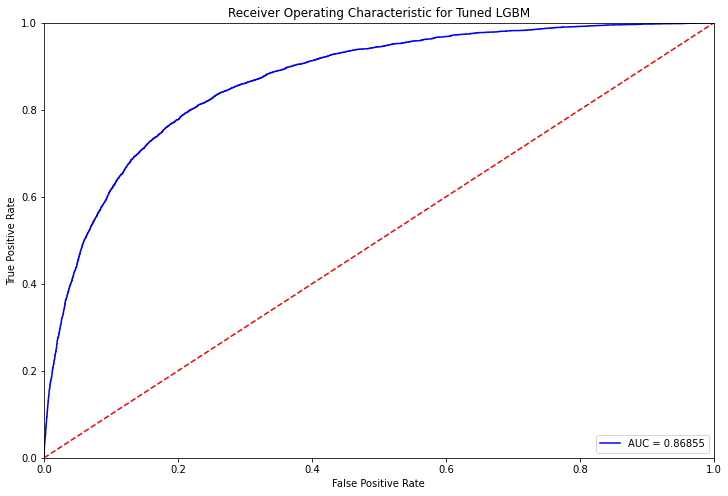

In [30]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Receiver Operating Characteristic for Tuned LGBM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.5f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### CatBoost ROC Curve

In [31]:
fpr_1, tpr_1, threshold_1 = metrics.roc_curve(y_test, preds_proba) #y_test and preds should both be arrays
roc_auc_1 = metrics.auc(fpr_1, tpr_1)

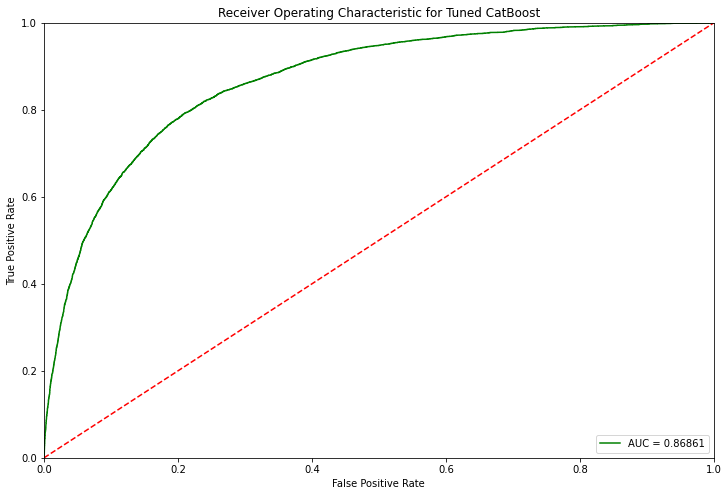

In [32]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Receiver Operating Characteristic for Tuned CatBoost')
plt.plot(fpr_1, tpr_1, 'g', label = 'AUC = %0.5f' % roc_auc_1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Simple Ensembled ROC Curve

In [33]:
fpr_2, tpr_2, threshold_2 = metrics.roc_curve(y_test, ensemble)
roc_auc_2 = metrics.auc(fpr_2, tpr_2)

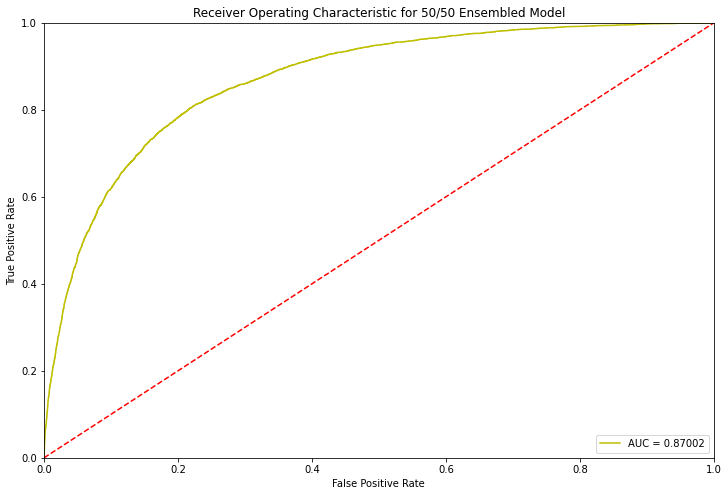

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Receiver Operating Characteristic for 50/50 Ensembled Model')
plt.plot(fpr_2, tpr_2, 'y', label = 'AUC = %0.5f' % roc_auc_2)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### AUCs for Ensembled Models

In [35]:
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(y_test, lr_ens_val_prob)
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

In [36]:
fpr_rfc, tpr_rfc, threshold_rfc = metrics.roc_curve(y_test, rfc_ens_val_prob)
roc_auc_rfc = metrics.auc(fpr_rfc, tpr_rfc)

In [37]:
fpr_gbc, tpr_gbc, threshold_gbc = metrics.roc_curve(y_test, gbc_ens_val_prob)
roc_auc_gbc = metrics.auc(fpr_gbc, tpr_gbc)

In [38]:
fpr_v, tpr_v, threshold_v = metrics.roc_curve(y_test, v_val_prob)
roc_auc_v = metrics.auc(fpr_v, tpr_v)

In [39]:
fpr_st, tpr_st, threshold_st = metrics.roc_curve(y_test, st_val_prob)
roc_auc_st = metrics.auc(fpr_st, tpr_st)

In [40]:
print("AUC for LGBM Model: ", roc_auc)
print("AUC for Catboost Model: ", roc_auc_1)
print("AUC for Simple Weighted Ensemble: ", roc_auc_2)
print("AUC for Logistic Regression Ensemble: ", roc_auc_lr)
print("AUC for Random Forest Classifier Ensemble: ", roc_auc_rfc)
print("AUC for Gradient Boosting Classifier Ensemble: ", roc_auc_gbc)
print("AUC for Voting Classifier Ensemble: ", roc_auc_v)
print("AUC for Stacking Classifier Ensemble: ", roc_auc_st)

AUC for LGBM Model:  0.8685541685490012
AUC for Catboost Model:  0.8686130545100459
AUC for Simple Weighted Ensemble:  0.870018035650548
AUC for Logistic Regression Ensemble:  0.8689439664971557
AUC for Random Forest Classifier Ensemble:  0.7893328889772293
AUC for Gradient Boosting Classifier Ensemble:  0.8633924916506381
AUC for Voting Classifier Ensemble:  0.8669466756685016
AUC for Stacking Classifier Ensemble:  0.8672625706927004


### Interpretability & Explainability Analysis

##### LGBM Model

In [72]:
lgbm_explainer = shap.TreeExplainer(lgbm_model)

In [85]:
lgbm_shap_values = lgbm_explainer.shap_values(X_test)

In [86]:
lgbm_shap_values_0 = lgbm_shap_values[0] #initial list is 2d array, [1] is just negative values of [0]
lgbm_shap_values_1 = lgbm_shap_values[1]

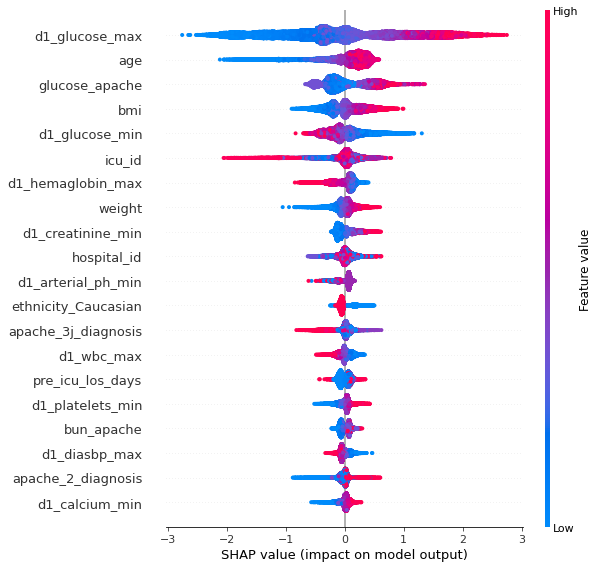

In [89]:
shap.summary_plot(lgbm_shap_values_1, X_test)

##### CatBoost Model

In [63]:
catboost_explainer = shap.TreeExplainer(catboost_model)

In [69]:
catboost_shap_values = catboost_explainer.shap_values(X_test)

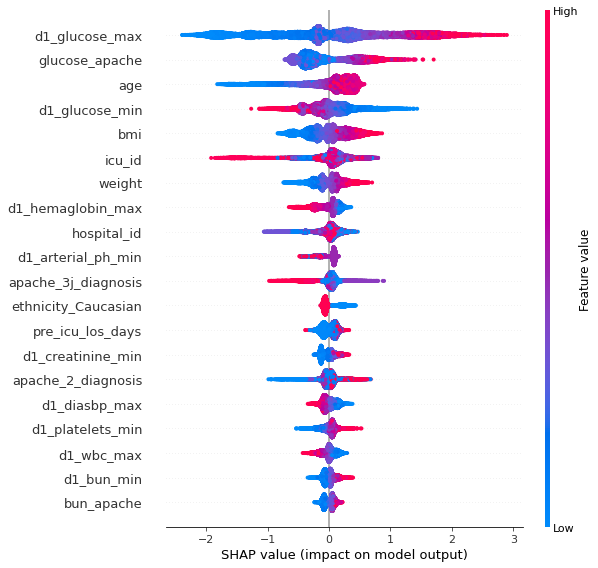

In [71]:
shap.summary_plot(catboost_shap_values, X_test)

##### Visualizing individual predictions with waterfall plots

In [91]:
catboost_shap_obj = catboost_explainer(X_test)

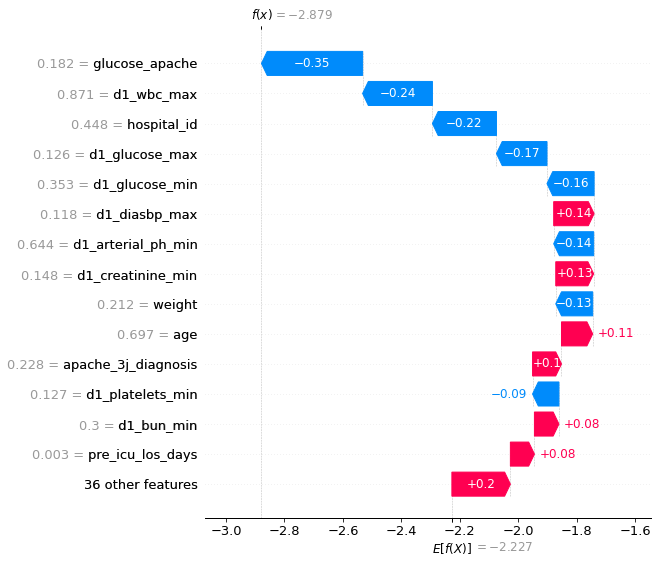

In [110]:
shap.plots.waterfall(catboost_shap_obj[0], max_display=15)

### Code References

https://www.kaggle.com/pashupatigupta/introduction-to-ensembling-techniques

https://slundberg.github.io/shap/notebooks/Census%20income%20classification%20with%20LightGBM.html